# Import Library

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
!pip install wget
import wget
url = 'https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Medium.ttf'
font = wget.download(url)

In [5]:
!pip install tensorflow

In [6]:
import tensorflow

In [7]:
!pip install transformers
from transformers import pipeline

In [8]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [9]:
from tqdm import tqdm

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import Data

In [11]:
vertikal = ["ambon.html",
"balikpapan.html",
"banda_aceh.html",
"bandar_lampung.html",
"bandung.html",
"banjarmasin.html",
"batam.html",
"bekasi.html",
"bengkulu.html",
"biak.html",
"bima.html",
"bogor.html",
"bontang.html",
"bukittinggi.html",
"cirebon.html",
"denpasar.html",
"djkn.html",
"dumai.html",
"gorontalo.html",
"jakarta.html",
"jambi.html",
"jayapura.html",
"jember.html",
"kendari.html",
"kisaran.html",
"kupang.html",
"lahat.html",
"lhokseumawe.html",
"madiun.html",
"makassar.html",
"malang.html",
"mamuju.html",
"manado.html",
"mataram.html",
"medan.html",
"metro.html",
"padang.html",
"padang_sidempuan.html",
"palangkaraya.html",
"palembang.html",
"palopo.html",
"palu.html",
"pamekasan.html",
"pangkal_pinang.html",
"pangkalan_bun.html",
"parepare.html",
"pekalongan.html",
"pekanbaru.html",
"pematang_siantar.html",
"pontianak.html",
"purwakarta.html",
"purwokerto.html",
"samarinda.html",
"semarang.html",
"serang.html",
"sidoarjo.html",
"singaraja.html",
"singkawang.html",
"sorong.html",
"surabaya.html",
"surakarta.html",
"tangerang1.html",
"tangerang2.html",
"tarakan.html",
"tasikmalaya.html",
"tegal.html",
"ternate.html",
"yogyakarta.html"]

### <font color='blue'>Review Data</font>

In [12]:
df_name = []
df_text = []
df_rate = []
df_time = []
df_loc = []
df = pd.DataFrame(columns = ['name', 'text', 'rate', 'time', 'loc'])
df.reset_index()
df

Empty DataFrame
Columns: [name, text, rate, time, loc]
Index: []

In [13]:
for v in vertikal:
    with open (v, 'r', encoding='utf-8') as html_file:
        content = html_file.read()
        soup = BeautifulSoup(content, 'lxml')
        name = soup.find_all('div', class_ = 'jftiEf fontBodyMedium')
        text = soup.find_all('span', class_ = 'wiI7pd')
        rate = soup.find_all('span', class_ = 'kvMYJc')
        time = soup.find_all('span', class_ = 'rsqaWe')
        for t in name:
            name_user = t.get('aria-label')
            df_name.append(name_user)
        for t in text:
            text_user = t.text
            df_text.append(text_user)
        for t in rate:
            rate_user = int(t.get('aria-label').split()[0])
            df_rate.append(rate_user)
        for t in time:
            time_user = t.text
            df_time.append(time_user)
        for t in time:
            loc = v.replace('.html', '').replace('_', ' ').capitalize()
            df_loc.append(loc)

df['name'] = df_name
df['text'] = df_text
df['rate'] = df_rate
df['time'] = df_time
df['loc'] = df_loc
df

name                                               text  \
0       thaty laipeny  Pelayanannya sangat baik sekali, orang2nya san...   
1           Simak BMN  Pelayanan sangat baik, semoga kedepannya semak...   
2      Tajus Syarifin                  APT nya ramah dan sangat membantu   
3       Jhon Sahureka                       Pelayanannya ramah dan cepat   
4             anton w                          kpknl ambon yg lebih baik   
...               ...                                                ...   
2718  rachmawan setyo                                                      
2719     Paryana Yana                                                      
2720   Agus Kurniawan                                                      
2721          Don Lie                                                      
2722      hasto novic                                                      

      rate           time         loc  
0        5  11 bulan lalu       Ambon  
1        5  11 bulan lalu       Ambon  
2        5  11 bulan lalu       Ambon  
3        5   setahun lalu       Ambon  
4        5  11 bulan lalu       Ambon  
...    ...            ...         ...  
2718     5   5 bulan lalu  Yogyakarta  
2719     5   4 tahun lalu  Yogyakarta  
2720     5   6 bulan lalu  Yogyakarta  
2721     5   2 tahun lalu  Yogyakarta  
2722     5  11 bulan lalu  Yogyakarta  

[2723 rows x 5 columns]

### <font color='blue'>Question Data</font>

In [14]:
q_name = []
q_text = []
q_time = []
q_loc = []
q = pd.DataFrame(columns = ['name', 'text', 'time', 'loc'])
q.reset_index()
q

Empty DataFrame
Columns: [name, text, time, loc]
Index: []

In [15]:
for v in vertikal:
    with open (v, 'r', encoding='utf-8') as html_file:
        content = html_file.read()
        soup = BeautifulSoup(content, 'lxml')
        name = soup.find_all('div', class_ = 'uHQJYd')
        text = soup.find_all('div', class_ = ['NXtIPd d2xizc', 'NXtIPd'])
        time = soup.find_all('a', class_='Gh37Sc')
        for t in name:
            name_user = t.text
            q_name.append(name_user)
        for t in text:
            text_user = t.text
            q_text.append(text_user)
        for t in time:
            time_user = t.find('div', class_ = 'W9MIqc').text
            q_time.append(time_user)
        for t in text:
            loc = v.replace('.html', '').replace('_', ' ').capitalize()
            q_loc.append(loc)

q['name'] = q_name
q['text'] = q_text
q['time'] = q_time
q['loc'] = q_loc
q

name                                               text  \
0      David Sihombing  \n                    Selamat sore pak,saya da...   
1           Zaenal Nal  \n                    Selamat siang... mau nan...   
2       PN KPKNL Ambon  \n                    (Diterjemahkan oleh Goog...   
3         BOCIL GAMING  \n            Slmat pagi Mau nanya soal persya...   
4      Rando Wattimena  \n            Hallo pak shalom, selamat pagiAp...   
..                 ...                                                ...   
965       Bimoo Bimbim  \n            Kapan ada pelelang kendaraan ber...   
966      Ahmadi Madura                                   Kapan ada lilang   
967         Ica Susana  \n            Selamat siang,saya mau bertanya ...   
968        sujayadi 69                             Kapan ada lelang mobil   
969  Rosidin Kalibagor                Kapan ada lelang kendaraan bermotor   

              time         loc  
0     9 bulan lalu       Ambon  
1     2 bulan lalu       Ambon  
2     3 bulan lalu       Ambon  
3     2 tahun lalu       Ambon  
4    11 bulan lalu       Ambon  
..             ...         ...  
965   4 tahun lalu  Yogyakarta  
966   4 tahun lalu  Yogyakarta  
967   4 tahun lalu  Yogyakarta  
968   4 tahun lalu  Yogyakarta  
969   5 tahun lalu  Yogyakarta  

[970 rows x 4 columns]

# Data Preprocessing

### <font color='blue'>Review Data</font>

In [16]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

name                                               text  \
0       thaty laipeny  Pelayanannya sangat baik sekali, orang2nya san...   
1           Simak BMN  Pelayanan sangat baik, semoga kedepannya semak...   
2      Tajus Syarifin                  APT nya ramah dan sangat membantu   
3       Jhon Sahureka                       Pelayanannya ramah dan cepat   
4             anton w                          kpknl ambon yg lebih baik   
...               ...                                                ...   
2718  rachmawan setyo                                                NaN   
2719     Paryana Yana                                                NaN   
2720   Agus Kurniawan                                                NaN   
2721          Don Lie                                                NaN   
2722      hasto novic                                                NaN   

      rate           time         loc  
0        5  11 bulan lalu       Ambon  
1        5  11 bulan lalu       Ambon  
2        5  11 bulan lalu       Ambon  
3        5   setahun lalu       Ambon  
4        5  11 bulan lalu       Ambon  
...    ...            ...         ...  
2718     5   5 bulan lalu  Yogyakarta  
2719     5   4 tahun lalu  Yogyakarta  
2720     5   6 bulan lalu  Yogyakarta  
2721     5   2 tahun lalu  Yogyakarta  
2722     5  11 bulan lalu  Yogyakarta  

[2723 rows x 5 columns]

In [17]:
df['time'].value_counts()

setahun lalu     472
3 tahun lalu     412
4 tahun lalu     376
5 tahun lalu     363
2 tahun lalu     360
6 bulan lalu     127
11 bulan lalu    114
6 tahun lalu     113
10 bulan lalu    107
5 bulan lalu      57
8 bulan lalu      56
9 bulan lalu      55
7 bulan lalu      42
7 tahun lalu      24
2 bulan lalu      10
3 bulan lalu      10
4 bulan lalu       8
sebulan lalu       7
3 minggu lalu      3
8 tahun lalu       3
9 tahun lalu       1
5 hari lalu        1
1 hari lalu        1
seminggu lalu      1
Name: time, dtype: int64

In [18]:
df['time'] = df['time'].replace(['seminggu lalu', '1 hari lalu', '5 hari lalu'], 2023)
df['time'] = df['time'].replace(['3 minggu lalu', 'sebulan lalu', '4 bulan lalu', '3 bulan lalu', '2 bulan lalu', '7 bulan lalu', '9 bulan lalu', '8 bulan lalu', '5 bulan lalu', '10 bulan lalu', '11 bulan lalu', '6 bulan lalu', 'setahun lalu'], 2022)
df['time'] = df['time'].replace(['2 tahun lalu'], 2021)
df['time'] = df['time'].replace(['3 tahun lalu'], 2020)
df['time'] = df['time'].replace(['4 tahun lalu'], 2019)
df['time'] = df['time'].replace(['5 tahun lalu'], 2018)
df['time'] = df['time'].replace(['6 tahun lalu'], 2017)
df['time'] = df['time'].replace(['7 tahun lalu'], 2016)
df['time'] = df['time'].replace(['8 tahun lalu'], 2015)
df['time'] = df['time'].replace(['9 tahun lalu'], 2014)

In [19]:
df['time'].value_counts()

2022    1068
2020     412
2019     376
2018     363
2021     360
2017     113
2016      24
2015       3
2023       3
2014       1
Name: time, dtype: int64

In [20]:
df['loc'] = df['loc'].replace(['Djkn', 'Tangerang1', 'Tangerang2'], ['DJKN Pusat', 'Tangerang I', 'Tangerang II'])

In [21]:
df['loc'].value_counts()

Bogor               463
Cirebon             193
Tasikmalaya         141
Jakarta             123
Surakarta            83
                   ... 
Bontang               8
Pematang siantar      6
Jayapura              5
Lahat                 5
Tangerang I           1
Name: loc, Length: 68, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2723 non-null   object
 1   text    1273 non-null   object
 2   rate    2723 non-null   int64 
 3   time    2723 non-null   int64 
 4   loc     2723 non-null   object
dtypes: int64(2), object(3)
memory usage: 106.5+ KB


In [23]:
index_list = list(df.index.values)
id_new = []

In [24]:
for i in index_list:
    id_review = 'rvw' + str(i + 1)
    id_new.append(id_review)
id_new

['rvw1',
 'rvw2',
 'rvw3',
 'rvw4',
 'rvw5',
 'rvw6',
 'rvw7',
 'rvw8',
 'rvw9',
 'rvw10',
 'rvw11',
 'rvw12',
 'rvw13',
 'rvw14',
 'rvw15',
 'rvw16',
 'rvw17',
 'rvw18',
 'rvw19',
 'rvw20',
 'rvw21',
 'rvw22',
 'rvw23',
 'rvw24',
 'rvw25',
 'rvw26',
 'rvw27',
 'rvw28',
 'rvw29',
 'rvw30',
 'rvw31',
 'rvw32',
 'rvw33',
 'rvw34',
 'rvw35',
 'rvw36',
 'rvw37',
 'rvw38',
 'rvw39',
 'rvw40',
 'rvw41',
 'rvw42',
 'rvw43',
 'rvw44',
 'rvw45',
 'rvw46',
 'rvw47',
 'rvw48',
 'rvw49',
 'rvw50',
 'rvw51',
 'rvw52',
 'rvw53',
 'rvw54',
 'rvw55',
 'rvw56',
 'rvw57',
 'rvw58',
 'rvw59',
 'rvw60',
 'rvw61',
 'rvw62',
 'rvw63',
 'rvw64',
 'rvw65',
 'rvw66',
 'rvw67',
 'rvw68',
 'rvw69',
 'rvw70',
 'rvw71',
 'rvw72',
 'rvw73',
 'rvw74',
 'rvw75',
 'rvw76',
 'rvw77',
 'rvw78',
 'rvw79',
 'rvw80',
 'rvw81',
 'rvw82',
 'rvw83',
 'rvw84',
 'rvw85',
 'rvw86',
 'rvw87',
 'rvw88',
 'rvw89',
 'rvw90',
 'rvw91',
 'rvw92',
 'rvw93',
 'rvw94',
 'rvw95',
 'rvw96',
 'rvw97',
 'rvw98',
 'rvw99',
 'rvw100',
 'rvw101

In [25]:
df['id'] = id_new
df = df[['id', 'name', 'text', 'rate', 'time', 'loc']]
df

id             name  \
0        rvw1    thaty laipeny   
1        rvw2        Simak BMN   
2        rvw3   Tajus Syarifin   
3        rvw4    Jhon Sahureka   
4        rvw5          anton w   
...       ...              ...   
2718  rvw2719  rachmawan setyo   
2719  rvw2720     Paryana Yana   
2720  rvw2721   Agus Kurniawan   
2721  rvw2722          Don Lie   
2722  rvw2723      hasto novic   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
2718                                                NaN     5  2022   
2719                                                NaN     5  2019   
2720                                                NaN     5  2022   
2721                                                NaN     5  2021   
2722                                                NaN     5  2022   

             loc  
0          Ambon  
1          Ambon  
2          Ambon  
3          Ambon  
4          Ambon  
...          ...  
2718  Yogyakarta  
2719  Yogyakarta  
2720  Yogyakarta  
2721  Yogyakarta  
2722  Yogyakarta  

[2723 rows x 6 columns]

#### <font color='orange'>Review with Text</font>

In [26]:
df_text = df[df['text'].notna()]
df_text = df_text.reset_index(drop = True)
df_text

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 Kantor yang bagus.     5  2018   
1269                            Balai lelang yogyakarta     5  2019   
1270                                              Siiip     5  2022   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...     5  2022   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice     5  2020   

             loc  
0          Ambon  
1          Ambon  
2          Ambon  
3          Ambon  
4          Ambon  
...          ...  
1268  Yogyakarta  
1269  Yogyakarta  
1270  Yogyakarta  
1271  Yogyakarta  
1272  Yogyakarta  

[1273 rows x 6 columns]

In [27]:
df_text['loc'].value_counts()

Bogor          168
Cirebon         97
Tasikmalaya     67
Jakarta         61
Surakarta       52
              ... 
Lahat            2
Dumai            2
Banda aceh       2
Tangerang I      1
Bontang          1
Name: loc, Length: 68, dtype: int64

### <font color='blue'>Question Data</font>

In [28]:
q['loc'] = q['loc'].replace(['Djkn', 'Tangerang1', 'Tangerang2'], ['DJKN Pusat', 'Tangerang I', 'Tangerang II'])
q['loc'].value_counts()

Surabaya            48
Malang              48
Jakarta             47
Denpasar            41
Bandung             40
                    ..
Singkawang           3
Pematang siantar     3
Bima                 2
Jayapura             2
Gorontalo            2
Name: loc, Length: 62, dtype: int64

In [29]:
q

name                                               text  \
0      David Sihombing  \n                    Selamat sore pak,saya da...   
1           Zaenal Nal  \n                    Selamat siang... mau nan...   
2       PN KPKNL Ambon  \n                    (Diterjemahkan oleh Goog...   
3         BOCIL GAMING  \n            Slmat pagi Mau nanya soal persya...   
4      Rando Wattimena  \n            Hallo pak shalom, selamat pagiAp...   
..                 ...                                                ...   
965       Bimoo Bimbim  \n            Kapan ada pelelang kendaraan ber...   
966      Ahmadi Madura                                   Kapan ada lilang   
967         Ica Susana  \n            Selamat siang,saya mau bertanya ...   
968        sujayadi 69                             Kapan ada lelang mobil   
969  Rosidin Kalibagor                Kapan ada lelang kendaraan bermotor   

              time         loc  
0     9 bulan lalu       Ambon  
1     2 bulan lalu       Ambon  
2     3 bulan lalu       Ambon  
3     2 tahun lalu       Ambon  
4    11 bulan lalu       Ambon  
..             ...         ...  
965   4 tahun lalu  Yogyakarta  
966   4 tahun lalu  Yogyakarta  
967   4 tahun lalu  Yogyakarta  
968   4 tahun lalu  Yogyakarta  
969   5 tahun lalu  Yogyakarta  

[970 rows x 4 columns]

In [30]:
q_index_list = list(q.index.values)
q_id_new = []

In [31]:
for i in q_index_list:
    id_question = 'qst' + str(i + 1)
    q_id_new.append(id_question)
q_id_new

['qst1',
 'qst2',
 'qst3',
 'qst4',
 'qst5',
 'qst6',
 'qst7',
 'qst8',
 'qst9',
 'qst10',
 'qst11',
 'qst12',
 'qst13',
 'qst14',
 'qst15',
 'qst16',
 'qst17',
 'qst18',
 'qst19',
 'qst20',
 'qst21',
 'qst22',
 'qst23',
 'qst24',
 'qst25',
 'qst26',
 'qst27',
 'qst28',
 'qst29',
 'qst30',
 'qst31',
 'qst32',
 'qst33',
 'qst34',
 'qst35',
 'qst36',
 'qst37',
 'qst38',
 'qst39',
 'qst40',
 'qst41',
 'qst42',
 'qst43',
 'qst44',
 'qst45',
 'qst46',
 'qst47',
 'qst48',
 'qst49',
 'qst50',
 'qst51',
 'qst52',
 'qst53',
 'qst54',
 'qst55',
 'qst56',
 'qst57',
 'qst58',
 'qst59',
 'qst60',
 'qst61',
 'qst62',
 'qst63',
 'qst64',
 'qst65',
 'qst66',
 'qst67',
 'qst68',
 'qst69',
 'qst70',
 'qst71',
 'qst72',
 'qst73',
 'qst74',
 'qst75',
 'qst76',
 'qst77',
 'qst78',
 'qst79',
 'qst80',
 'qst81',
 'qst82',
 'qst83',
 'qst84',
 'qst85',
 'qst86',
 'qst87',
 'qst88',
 'qst89',
 'qst90',
 'qst91',
 'qst92',
 'qst93',
 'qst94',
 'qst95',
 'qst96',
 'qst97',
 'qst98',
 'qst99',
 'qst100',
 'qst101

In [32]:
q['id'] = q_id_new
q = q[['id', 'name', 'text', 'time', 'loc']]
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text           time  \
0    \n                    Selamat sore pak,saya da...   9 bulan lalu   
1    \n                    Selamat siang... mau nan...   2 bulan lalu   
2    \n                    (Diterjemahkan oleh Goog...   3 bulan lalu   
3    \n            Slmat pagi Mau nanya soal persya...   2 tahun lalu   
4    \n            Hallo pak shalom, selamat pagiAp...  11 bulan lalu   
..                                                 ...            ...   
965  \n            Kapan ada pelelang kendaraan ber...   4 tahun lalu   
966                                   Kapan ada lilang   4 tahun lalu   
967  \n            Selamat siang,saya mau bertanya ...   4 tahun lalu   
968                             Kapan ada lelang mobil   4 tahun lalu   
969                Kapan ada lelang kendaraan bermotor   5 tahun lalu   

            loc  
0         Ambon  
1         Ambon  
2         Ambon  
3         Ambon  
4         Ambon  
..          ...  
965  Yogyakarta  
966  Yogyakarta  
967  Yogyakarta  
968  Yogyakarta  
969  Yogyakarta  

[970 rows x 5 columns]

In [33]:
q['time'] = q['time'].replace(['seminggu lalu', '1 hari lalu', '5 hari lalu', '4 minggu lalu', '23 jam lalu'], 2023)
q['time'] = q['time'].replace(['3 minggu lalu', 'sebulan lalu', '4 bulan lalu', '3 bulan lalu', '2 bulan lalu', '7 bulan lalu', '9 bulan lalu', '8 bulan lalu', '5 bulan lalu', '10 bulan lalu', '11 bulan lalu', '6 bulan lalu', 'setahun lalu', '\nDiedit · 9 bulan lalu\n'], 2022)
q['time'] = q['time'].replace(['2 tahun lalu', '\nDiedit · 2 tahun lalu\n'], 2021)
q['time'] = q['time'].replace(['3 tahun lalu'], 2020)
q['time'] = q['time'].replace(['4 tahun lalu', '\nDiedit · 4 tahun lalu\n'], 2019)
q['time'] = q['time'].replace(['5 tahun lalu', '\n                Diedit · 5 tahun lalu\n'], 2018)
q['time'] = q['time'].replace(['6 tahun lalu'], 2017)
q['time'] = q['time'].replace(['7 tahun lalu'], 2016)
q['time'] = q['time'].replace(['8 tahun lalu'], 2015)
q['time'] = q['time'].replace(['9 tahun lalu'], 2014)

In [34]:
q['time'].value_counts()

2022                                                                       310
2020                                                                       234
2019                                                                       201
2021                                                                       160
2018                                                                        53
2023                                                                         7
\n                        Diedit · 2 tahun lalu\n                            2
\n                Diedit · 5 tahun lalu\n                                    1
\n                        Diedit · 4 tahun lalu\n                            1
\n                        Diedit · 9 bulan lalu\n                            1
Name: time, dtype: int64

In [35]:
q[q['time']==2023]

id                  name  \
164  qst165     Rendrana Soemirat   
278  qst279   Allula Yumaika Nuha   
308  qst309         zainur arifin   
420  qst421         udhyin gading   
428  qst429  Arlen Aditya Santoso   
485  qst486            Wahyu Yudi   
716  qst717          agung demang   

                                                  text  time       loc  
164          apakah terima barang antik utk di lelang?  2023     Bogor  
278  \n            Untuk verifikasi KTP dan NPWP yg...  2023   Jakarta  
308  \n                    siangpada tanggal 16.12....  2023     Jambi  
420  \n            Maaf admin knp data sya ga dires...  2023  Makassar  
428  \n                    Izin bertanya apakah KPK...  2023    Malang  
485  \n                    Apa bener ada pelelangan...  2023   Mataram  
716  \n                    mohon ijin, mau buat aku...  2023  Semarang

In [36]:
q[(q['time']!=2023) & (q['time']!=2022) & (q['time']!=2021) & (q['time']!=2020) & (q['time']!=2019) & (q['time']!=2018)]

id               name  \
203  qst204        made intari   
272  qst273        iqbal rifai   
357  qst358     NUR AIDA SE.MM   
379  qst380  Pardi Pardiansyah   
579  qst580    eddy juniansyah   

                                                  text  \
203  \n                    Maaf apakah kemarin ada ...   
272  \n            YTH. Bapak/ibuSaya mau tanya bag...   
357  \n                    Apakah ada Lelang Kendar...   
379                           Kapan lelang motor nya..   
579  \n                    Saya salah satu peserta ...   

                                                  time        loc  
203  \n                        Diedit · 2 tahun lal...   Denpasar  
272  \n                Diedit · 5 tahun lalu\n     ...    Jakarta  
357  \n                        Diedit · 2 tahun lal...    Kendari  
379  \n                        Diedit · 4 tahun lal...      Lahat  
579  \n                        Diedit · 9 bulan lal...  Palembang

In [37]:
q.loc[q['id'] == 'qst204', 'time'] = 2021
q.loc[q['id'] == 'qst273', 'time'] = 2018
q.loc[q['id'] == 'qst358', 'time'] = 2021
q.loc[q['id'] == 'qst380', 'time'] = 2019
q.loc[q['id'] == 'qst580', 'time'] = 2022

In [38]:
q['time'].value_counts()

2022    311
2020    234
2019    202
2021    162
2018     54
2023      7
Name: time, dtype: int64

In [39]:
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  time         loc  
0    \n                    Selamat sore pak,saya da...  2022       Ambon  
1    \n                    Selamat siang... mau nan...  2022       Ambon  
2    \n                    (Diterjemahkan oleh Goog...  2022       Ambon  
3    \n            Slmat pagi Mau nanya soal persya...  2021       Ambon  
4    \n            Hallo pak shalom, selamat pagiAp...  2022       Ambon  
..                                                 ...   ...         ...  
965  \n            Kapan ada pelelang kendaraan ber...  2019  Yogyakarta  
966                                   Kapan ada lilang  2019  Yogyakarta  
967  \n            Selamat siang,saya mau bertanya ...  2019  Yogyakarta  
968                             Kapan ada lelang mobil  2019  Yogyakarta  
969                Kapan ada lelang kendaraan bermotor  2018  Yogyakarta  

[970 rows x 5 columns]

# Text Preprocessing

In [40]:
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict

original                        replacement
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165             memetwit                            mentwit
15166             megangin                           memegang

[15167 rows x 2 columns]

In [41]:
lexicon = pd.read_csv('colloquial-indonesian-lexicon.csv', encoding='latin-1', header=None)
lexicon = lexicon.rename(columns={0: 'original', 
                                      1: 'replacement'})
lexicon = lexicon[['original', 'replacement']]
lexicon = lexicon.drop(0)
lexicon = lexicon.reset_index(drop = True)
lexicon

original    replacement
0          woww            wow
1         aminn           amin
2           met        selamat
3        netaas        menetas
4       keberpa       keberapa
...         ...            ...
15001  gataunya  enggak taunya
15002      gtau     enggak tau
15003     gatau     enggak tau
15004     fans2        fan-fan
15005   gaharus   enggak harus

[15006 rows x 2 columns]

In [42]:
fix_slang = pd.concat([alay_dict, lexicon], join = 'outer')
fix_slang = fix_slang.reset_index(drop = True)
fix_slang

original               replacement
0      anakjakartaasikasik  anak jakarta asyik asyik
1             pakcikdahtua         pak cik sudah tua
2           pakcikmudalagi         pak cik muda lagi
3              t3tapjokowi              tetap jokowi
4                       3x                 tiga kali
...                    ...                       ...
30168             gataunya             enggak taunya
30169                 gtau                enggak tau
30170                gatau                enggak tau
30171                fans2                   fan-fan
30172              gaharus              enggak harus

[30173 rows x 2 columns]

In [43]:
def preprocess(text):
  text = str(text).lower()
  text = re.sub('\n',' ',text)
  text = re.sub('/', ' ', text)
  text = re.sub('&amp;', ' ', text)
  text = re.sub(r'[^0-9a-zA-Z.?!]', ' ', text)
  text = re.sub(' + *', ' ', text)
  text = re.sub('  ', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text

def remove_doublespace(text):
  text = re.sub(r'\s+', ' ', text)
  return text

fix_slang_map = dict(zip(fix_slang['original'], fix_slang['replacement']))

def normalize_alay(text):
  return ' '.join([fix_slang_map[word] if word in fix_slang_map else word for word in text.split(' ')])

In [44]:
def fixSingkatan(text):
  text = re.sub(r'\b(aj|ae|aja)\b', 'saja', text)
  text = re.sub(r'\b(ak|gue|gw)\b','aku', text)
  text = re.sub(r'\b(belom|blm)\b', 'belum', text)
  text = re.sub(r'\b(bgt|bngt)\b', 'banget', text)
  text = re.sub(r'\b(bnyk|byk)\b', 'banyak', text)
  text = re.sub(r'\b(dlm)\b', 'dalam', text)
  text = re.sub(r'\b(dr)\b', 'dari', text)
  text = re.sub(r'\b(dg|dgn|dng)\b','dengan',text )
  text = re.sub(r'\b(dpt|dapet)\b', 'dapat', text)
  text = re.sub(r'\b(duar+)\b', 'duar', text)
  text = re.sub(r'\b(emg|emang)\b', 'memang', text)
  text = re.sub(r'\b(gt|gtu)\b', 'gitu', text)
  text = re.sub(r'\b(gatau)\b', 'tidak tau', text)
  text = re.sub(r'\b(gaada)\b', 'tidak ada', text)
  text = re.sub(r'\b(gamau)\b', 'tidak mau', text)
  text = re.sub(r'\b(gimana|gmn)\b', 'bagaimana', text)
  text = re.sub(r'\b(jgn)\b', 'jangan', text)
  text = re.sub(r'\b(jgn2|jangan2)\b', 'jangan jangan', text)
  text = re.sub(r'\b(jd|jdi)\b', 'jadi', text)
  text = re.sub(r'\b(karna|krn|krna)\b', 'karena', text)
  text = re.sub(r'\b(kyk|kek)\b', 'kayak', text)
  text = re.sub(r'\b(kl|klo|kalo)\b', 'kalau', text)
  text = re.sub(r'\b(klian)\b', 'kalian', text)
  text = re.sub(r'\b(knp)\b', 'kenapa', text)
  text = re.sub(r'\b(kpd)\b', 'kepada', text)
  text = re.sub(r'\b(lg)\b', 'lagi', text)
  text = re.sub(r'\b(lgsg)\b', 'langsung', text)
  text = re.sub(r'\b(mrk)\b', 'mereka', text)
  text = re.sub(r'\b(pd)\b', 'pada', text)
  text = re.sub(r'\b(pdhl)\b', 'padahal', text)
  text = re.sub(r'\b(pake)\b', 'pakai', text)
  text = re.sub(r'\b(org)\b', 'orang', text)
  text = re.sub(r'\b(org2)\b', 'orang orang', text)
  text = re.sub(r'\b(sbg)\b', 'sebagai', text)
  text = re.sub(r'\b(skrg)\b', 'sekarang', text)
  text = re.sub(r'\b(sm)\b', 'sama', text)
  text = re.sub(r'\b(spt)\b', 'seperti', text)
  text = re.sub(r'\b(dah|sdh|udh|udah)\b', 'sudah', text)
  text = re.sub(r'\b(tp|tpi)\b', 'tapi', text)
  text = re.sub(r'\b(tiba2|tbtb|tb2)\b', 'tiba tiba', text)
  text = re.sub(r'\b(td|tdi)\b', 'tadi', text)
  text = re.sub(r'\b(tdk|g|ga|gak|gk|engga|enggak|ngga|nggak|kaga|kagak|tak)\b', 'tidak', text)
  text = re.sub(r'\b(trus|trs)\b', 'terus', text)
  text = re.sub(r'\b(tsb)\b', 'tersebut', text)
  text = re.sub(r'\b(ttg)\b', 'tentang', text)
  text = re.sub(r'\b(utk)\b', 'untuk', text)
  text = re.sub(r'\b(ya+h*)\b', 'ya', text)
  text = re.sub(r'\b(yg)\b', 'yang', text)
  text = re.sub(r'\b(telphone|teleponnya|ditelpon|telpon|ditelp|telepon|telp|kontak seluler|tlp|ditlpon|telfon)\b', 'telepon', text)
  text = re.sub(r'\b(cpadahal)\b', 'padahal', text)
  text = re.sub(r'\b(makasih|trimakasih|thank you|thankyouu|trims|terimakasih|trima kasih|terimakasihbapak|trima ksh)\b', 'terima kasih', text)
  text = re.sub(r'\b(prosesdur)\b', 'prosedur', text)
  text = re.sub(r'\b(adeeeem|dgn|dngin)\b', 'dingin', text)
  text = re.sub(r'\b(kpkl|kppln)\b', 'kpknl', text)
  text = re.sub(r'\b(dsna|disna)\b', 'di sana', text)
  text = re.sub(r'\b(makin)\b', 'semakin', text)
  text = re.sub(r'\b(skrang)\b', 'sekarang', text)
  text = re.sub(r'\b(lg)\b', 'lagi', text)
  text = re.sub(r'\b(berulang2)\b', 'berulang ulang', text)
  text = re.sub(r'\b(penjelasanx)\b', 'penjelasannya', text)
  text = re.sub(r'\b(kedisiplinannya)\b', 'disiplin', text)
  text = re.sub(r'\b(surat2)\b', 'surat surat', text)
  text = re.sub(r'\b(nyusahin)\b', 'susah', text)
  text = re.sub(r'\b(blm)\b', 'belum', text)
  text = re.sub(r'\b(kuitansi|switangsi|kuitansinya|kwitansinya)\b', 'kwitansi', text)
  text = re.sub(r'\b(dafang)\b', 'datang', text)
  text = re.sub(r'\b(bls|bales)\b', 'balas', text)
  text = re.sub(r'\b(gmn)\b', 'bagaimana', text)
  text = re.sub(r'\b(sya|sy|ak|aku)\b', 'saya', text)
  text = re.sub(r'\b(sgat|sgt|sngt|sngat)\b', 'sangat', text)
  text = re.sub(r'\b(masib)\b', 'masih', text)
  text = re.sub(r'\b(acount|accounya)\b', 'akun', text)
  text = re.sub(r'\b(pdhal|pdhl)\b', 'padahal', text)
  text = re.sub(r'\b(wani)\b', 'berani', text)
  text = re.sub(r'\b(sll|selalu+u*)\b', 'selalu', text)
  text = re.sub(r'\b(amin|aamiiin|amen)\b', 'aamiin', text)
  text = re.sub(r'\b(th|thn|taun)\b', 'tahun', text)
  text = re.sub(r'\b(kemdala)\b', 'kendala', text)
  text = re.sub(r'\b(sarankah)\b', 'saran', text)
  text = re.sub(r'\b(professional)\b', 'profesional', text)
  text = re.sub(r'\b(lama+!*|lamanya)\b', 'lama', text)
  text = re.sub(r'\b(pelayanane|pelayanannya|dlayani)\b', 'pelayanan', text)
  text = re.sub(r'\b(lambat+.*)\b', 'lambat', text)
  text = re.sub(r'\b(lama+.*)\b', 'lama', text)
  text = re.sub(r'\b(veryfikasi|verifikasinya|terverifikasi)\b', 'verifikasi', text)
  text = re.sub(r'\b(diterjemahkan oleh google|asli)\b', '', text)
  text = re.sub(r'\b(pk|pke|pake)\b', 'memakai', text)
  text = re.sub(r'\b(ofline)\b', 'offline', text)
  text = re.sub(r'\b(menemuka)\b', 'menemukan', text)
  text = re.sub(r'\b(jd|jdi)\b', 'jadi', text)
  text = re.sub(r'\b(muantappp|kerennnn|terbaikkk|bagusss|keren...|mantab...|siiip|bagusbb|mantap|mantabz|keren|mantab|mantabzzz|top|topp|toppp|kerennn)\b', 'bagus', text)
  text = re.sub(r'\b(gituuuu|gtu|gt)\b', 'begitu', text)
  text = re.sub(r'\b(bs|bsa)\b', 'bisa', text)
  text = re.sub(r'\b(dg|dgn)\b', 'dengan', text)
  text = re.sub(r'\b(ngantri|antre|ngantre)\b', 'antri', text)
  text = re.sub(r'\b(risalahnya)\b', 'risalah', text)
  text = re.sub(r'\b(respont|respons|respond|response)\b', 'respon', text)
  text = re.sub(r'\b(responsiv|responsive)\b', 'responsif', text)
  text = re.sub(r'\b(soluyif)\b', 'solutif', text)
  text = re.sub(r'\b(luaaas)\b', 'luas', text)
  text = re.sub(r'\b(sd)\b', 'sampai dengan', text)
  text = re.sub(r'\b(luv)\b', 'sayang', text)
  text = re.sub(r'\b(ramah-ramah)\b', 'ramah ramah', text)
  text = re.sub(r'\b(smgt|smgat|smngt|smngat|smangat)\b', 'semangat', text)
  text = re.sub(r'\b(cepatt|cpt|cpat|cept)\b', 'cepat', text)
  text = re.sub(r'\b(ginii|ngeten)\b', 'begini', text)
  text = re.sub(r'\b(org)\b', 'orang', text)
  text = re.sub(r'\b(djawab)\b', 'dijawab', text)
  text = re.sub(r'\b(ttap|ttp)\b', 'tetap', text)
  text = re.sub(r'\b(pancen|mmg)\b', 'memang', text)
  text = re.sub(r'\b(komuniksinya)\b', 'komunikasinya', text)
  text = re.sub(r'\b(utk)\b', 'untuk', text)
  text = re.sub(r'\b(ok)\b', 'oke', text)
  text = re.sub(r'\b(lelsng)\b', 'lelang', text)
  text = re.sub(r'\b(tempak|tempatnya|tmpatny|tempatny)\b', 'tempat', text)
  text = re.sub(r'\b(krn)\b', 'karena', text)
  text = re.sub(r'\b(kerennnnbarokalloh)\b', 'bagus barakallah', text)
  text = re.sub(r'\b(orang2nya)\b', 'orang orangnya', text)
  text = re.sub(r'\b(\n\n\n)\b', ' ', text)
  text = re.sub(r'\b(keadan)\b', 'keadaan', text)
  text = re.sub(r'\b(kab)\b', 'kabupaten', text)
  text = re.sub(r'\b(ibu2)\b', 'ibu ibu', text)
  text = re.sub(r'\b(bapak2)\b', 'bapak bapak', text)
  text = re.sub(r'\b(benar2)\b', 'benar benar', text)
  text = re.sub(r'\b(ramah2)\b', 'ramah ramah', text)
  text = re.sub(r'\b(rapih)\b', 'rapi', text)
  text = re.sub(r'\b(friendly)\b', 'ramah', text)
  text = re.sub(r'\b(kpkln)\b', 'kpknl', text)
  text = re.sub(r'\b(mbois)\b', 'bagus', text)
  text = re.sub(r'\b(diijinkan)\b', 'diizinkan', text)
  text = re.sub(r'\b(staff)\b', 'staf', text)
  text = re.sub(r'\b(playanan)\b', 'pelayanan', text)
  text = re.sub(r'\b(sagat)\b', 'sangat', text)
  text = re.sub(r'\b(bayak)\b', 'banyak', text)
  text = re.sub(r'\b(penglaman)\b', 'pengalaman', text)
  text = re.sub(r'\b(kasyan)\b', 'kasihan', text)
  text = re.sub(r'\b(gakpernah)\b', 'tidak pernah', text)
  text = re.sub(r'\b(pingintau)\b', 'ingin tahu', text)
  text = re.sub(r'\b(kbri)\b', 'mengabari', text)
  text = re.sub(r'\b(telponnya|menelpon)\b', 'telepon', text)
  text = re.sub(r'\b(bpk)\b', 'bapak', text)
  text = re.sub(r'\b(sateliti)\b', 'satelit', text)
  text = re.sub(r'\b(apresisi)\b', 'apresiasi', text)
  text = re.sub(r'\b(memuaska)\b', 'memuaskan', text)
  text = re.sub(r'\b(staffs)\b', 'staf', text)
  text = re.sub(r'\b(staf)\b', 'pegawai', text)
  text = re.sub(r'\b(masyrakat)\b', 'masyarakat', text)
  text = re.sub(r'\b(yogjakarta)\b', 'pwngurusan', text)
  text = re.sub(r'\b(iinformasi)\b', 'informasi', text)
  text = re.sub(r'\b(banguanan)\b', 'bangunan', text)
  text = re.sub(r'\b(perjalananny)\b', 'perjalanannya', text)
  text = re.sub(r'\b(belit2)\b', 'belit belit', text)
  text = re.sub(r'\b(doble)\b', 'double', text)
  text = re.sub(r'\b(klau)\b', 'kalau', text)
  text = re.sub(r'\b(rekomen)\b', 'rekomendasi', text)
  text = re.sub(r'\b(berjam2)\b', 'berjam jam', text)
  text = re.sub(r'\b(gasspoollll)\b', 'gas', text)
  text = re.sub(r'\b(joz+z*|jos+s*)\b', 'bagus', text)
  text = re.sub(r'\b(24jam)\b', '24 jam', text)
  text = re.sub(r'\b(bingits|bangett+t*)\b', 'banget', text)
  text = re.sub(r'\b(sllu)\b', 'selalu', text)
  text = re.sub(r'\b(angat|sangatt+t*)\b', 'sangat', text)
  text = re.sub(r'\b(mmbantu)\b', 'membantu', text)
  text = re.sub(r'\b(adar)\b', 'sadar', text)
  text = re.sub(r'\b(pagiapa)\b', 'pagi apa', text)
  text = re.sub(r'\b(lilang)\b', 'lelang', text)
  return text

In [45]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

def fixStem(text):
  text = re.sub(r'\b(moga)\b', 'semoga', text)
  text = re.sub(r'\b(muas)\b', 'puas', text)
  return text

In [46]:
idn_stopwords = stopwords.words('indonesian')
idn_stopwords.extend(
    ['ae','ah','aing','aj','aja','ak','anjir','ayo','banget','belom','bener2','bgt','biar','bikin','blm','btw','bnyk','byk','cuman','d','dah','dapet','deh','deket',
     'dg','dgn','disana','dll','doang','dpt','dr','drpd','duar','duarr','duarrr','duluan','e', 'eh','emang','emg','engga','g','ga','gak','gaada','gamau','gara',
     'gara2','gatau','gegara','gimana','gini','gtu','gitu','gk','gmn','gt','gue','gw','hah', 'haha','jd','jdi','jg','jgn','kagak','ka','kaga','kah','kak','kalo',
     'kali','karna','kau','kayak','kayaknya','kek','kl','klian','klo','knp','kpd','ku','krn','krna','kyk','la','lg','lgsg','lha','lho','lo','loh','lu','ma','mah','mending',
     'min','mo','mrk','msh','na','nder','nge','ngga','nggak','ni','nih','ntar','nya','org','pakai','pake','pd','pdhl','salah','sama2','sampe','sbg','sdh',
     'sebenernya','sat','set','satset','si','sih','situ','skrg','sm','spt','tau','tau2','tbtb','tb2','td','tdk','tiba2','tp','tpi','ttg','trus','trs','tsb',
     'tu','tuh','udah','udh','utk','xixi','w','wes','wkwk','wkwkw','wkwkwk','wkwkwkwk','wow','x','y','yg','ya','yaa','yaaa','yah','ygy','yo','yuk'])
idn_stopwords.extend(
    ['ra','mbak','mas','kui','ki','po','ora','iki','karo','opo','sek','sik','arep','og','wae','ngono','tenan','ben','iso','kudu','sing','nek','dadi','pa','iku','saiki'])
idn_stopwords.remove('lama')
idn_stopwords.remove('lamanya')
idn_stopwords.remove('tempat')
idn_stopwords.remove('bekerja')
idn_stopwords.remove('baik')
idn_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut',
 'berikutnya',
 'be

In [47]:
def remove_stopword(text):
  text = re.sub('[.,!?]',' ',text)
  text = ' '.join(['' if word in idn_stopwords else word for word in text.split(' ')])
  text = re.sub(' + *', ' ', text)
  text = re.sub('  ', ' ', text)
  text = text.title()
  text = text.strip() 
  text = text.lower()
  text = re.sub(r'\s+', ' ', text)
  return text

### <font color='blue'>Review Data</font>

In [48]:
df_text['text_clean'] = df_text['text'].apply(preprocess)
df_text['text_clean'] = df_text['text_clean'].apply(normalize_alay)
df_text['text_clean'] = df_text['text_clean'].apply(fixSingkatan)
df_text['text_clean'] = df_text['text_clean'].apply(remove_doublespace)
df_text

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 Kantor yang bagus.     5  2018   
1269                            Balai lelang yogyakarta     5  2019   
1270                                              Siiip     5  2022   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...     5  2022   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice     5  2020   

             loc                                         text_clean  
0          Ambon  pelayanan sangat baik sekali orang orangnya sa...  
1          Ambon  pelayanan sangat baik semoga kedepannya semaki...  
2          Ambon                  apt nya ramah dan sangat membantu  
3          Ambon                          pelayanan ramah dan cepat  
4          Ambon                        kpknl ambon yang lebih baik  
...          ...                                                ...  
1268  Yogyakarta                                 kantor yang bagus.  
1269  Yogyakarta                            balai lelang yogyakarta  
1270  Yogyakarta                                              bagus  
1271  Yogyakarta             penampilan yang bagus good performance  
1272  Yogyakarta                                         bagus nice  

[1273 rows x 7 columns]

In [49]:
df_text['text_stemmed'] = ''

for i in df_text.index:
  df_text['text_stemmed'][i] = stemmed_wrapper(df_text['text_clean'][i])

df_text

<ipython-input-49-343fc487c6ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['text_stemmed'][i] = stemmed_wrapper(df_text['text_clean'][i])


id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 Kantor yang bagus.     5  2018   
1269                            Balai lelang yogyakarta     5  2019   
1270                                              Siiip     5  2022   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...     5  2022   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice     5  2020   

             loc                                         text_clean  \
0          Ambon  pelayanan sangat baik sekali orang orangnya sa...   
1          Ambon  pelayanan sangat baik semoga kedepannya semaki...   
2          Ambon                  apt nya ramah dan sangat membantu   
3          Ambon                          pelayanan ramah dan cepat   
4          Ambon                        kpknl ambon yang lebih baik   
...          ...                                                ...   
1268  Yogyakarta                                 kantor yang bagus.   
1269  Yogyakarta                            balai lelang yogyakarta   
1270  Yogyakarta                                              bagus   
1271  Yogyakarta             penampilan yang bagus good performance   
1272  Yogyakarta                                         bagus nice   

                                           text_stemmed  
0     layan sangat baik sekali orang orang sangat ramah  
1     layan sangat baik moga depan makin makin baik ...  
2                        apt nya ramah dan sangat bantu  
3                                 layan ramah dan cepat  
4                           kpknl ambon yang lebih baik  
...                                                 ...  
1268                                  kantor yang bagus  
1269                            balai lelang yogyakarta  
1270                                              bagus  
1271                 tampil yang bagus good performance  
1272                                         bagus nice  

[1273 rows x 8 columns]

In [50]:
df_text['text_stemmed'] = df_text['text_stemmed'].apply(fixStem)
df_text

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 Kantor yang bagus.     5  2018   
1269                            Balai lelang yogyakarta     5  2019   
1270                                              Siiip     5  2022   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...     5  2022   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice     5  2020   

             loc                                         text_clean  \
0          Ambon  pelayanan sangat baik sekali orang orangnya sa...   
1          Ambon  pelayanan sangat baik semoga kedepannya semaki...   
2          Ambon                  apt nya ramah dan sangat membantu   
3          Ambon                          pelayanan ramah dan cepat   
4          Ambon                        kpknl ambon yang lebih baik   
...          ...                                                ...   
1268  Yogyakarta                                 kantor yang bagus.   
1269  Yogyakarta                            balai lelang yogyakarta   
1270  Yogyakarta                                              bagus   
1271  Yogyakarta             penampilan yang bagus good performance   
1272  Yogyakarta                                         bagus nice   

                                           text_stemmed  
0     layan sangat baik sekali orang orang sangat ramah  
1     layan sangat baik semoga depan makin makin bai...  
2                        apt nya ramah dan sangat bantu  
3                                 layan ramah dan cepat  
4                           kpknl ambon yang lebih baik  
...                                                 ...  
1268                                  kantor yang bagus  
1269                            balai lelang yogyakarta  
1270                                              bagus  
1271                 tampil yang bagus good performance  
1272                                         bagus nice  

[1273 rows x 8 columns]

In [51]:
df_text['text_without_stopwords'] = df_text["text_stemmed"].apply(remove_stopword)
df_text

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  rate  time  \
0     Pelayanannya sangat baik sekali, orang2nya san...     5  2022   
1     Pelayanan sangat baik, semoga kedepannya semak...     5  2022   
2                     APT nya ramah dan sangat membantu     5  2022   
3                          Pelayanannya ramah dan cepat     5  2022   
4                             kpknl ambon yg lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 Kantor yang bagus.     5  2018   
1269                            Balai lelang yogyakarta     5  2019   
1270                                              Siiip     5  2022   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...     5  2022   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice     5  2020   

             loc                                         text_clean  \
0          Ambon  pelayanan sangat baik sekali orang orangnya sa...   
1          Ambon  pelayanan sangat baik semoga kedepannya semaki...   
2          Ambon                  apt nya ramah dan sangat membantu   
3          Ambon                          pelayanan ramah dan cepat   
4          Ambon                        kpknl ambon yang lebih baik   
...          ...                                                ...   
1268  Yogyakarta                                 kantor yang bagus.   
1269  Yogyakarta                            balai lelang yogyakarta   
1270  Yogyakarta                                              bagus   
1271  Yogyakarta             penampilan yang bagus good performance   
1272  Yogyakarta                                         bagus nice   

                                           text_stemmed  \
0     layan sangat baik sekali orang orang sangat ramah   
1     layan sangat baik semoga depan makin makin bai...   
2                        apt nya ramah dan sangat bantu   
3                                 layan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                  kantor yang bagus   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271                 tampil yang bagus good performance   
1272                                         bagus nice   

             text_without_stopwords  
0      layan baik orang orang ramah  
1            layan baik semoga baik  
2                   apt ramah bantu  
3                 layan ramah cepat  
4                  kpknl ambon baik  
...                             ...  
1268                   kantor bagus  
1269        balai lelang yogyakarta  
1270                          bagus  
1271  tampil bagus good performance  
1272                     bagus nice  

[1273 rows x 9 columns]

In [52]:
df_text = df_text[['id', 'name', 'text', 'text_clean', 'text_stemmed', 'text_without_stopwords', 'rate', 'time', 'loc']]
df_text

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  \
0     Pelayanannya sangat baik sekali, orang2nya san...   
1     Pelayanan sangat baik, semoga kedepannya semak...   
2                     APT nya ramah dan sangat membantu   
3                          Pelayanannya ramah dan cepat   
4                             kpknl ambon yg lebih baik   
...                                                 ...   
1268                                 Kantor yang bagus.   
1269                            Balai lelang yogyakarta   
1270                                              Siiip   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice   

                                             text_clean  \
0     pelayanan sangat baik sekali orang orangnya sa...   
1     pelayanan sangat baik semoga kedepannya semaki...   
2                     apt nya ramah dan sangat membantu   
3                             pelayanan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                 kantor yang bagus.   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271             penampilan yang bagus good performance   
1272                                         bagus nice   

                                           text_stemmed  \
0     layan sangat baik sekali orang orang sangat ramah   
1     layan sangat baik semoga depan makin makin bai...   
2                        apt nya ramah dan sangat bantu   
3                                 layan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                  kantor yang bagus   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271                 tampil yang bagus good performance   
1272                                         bagus nice   

             text_without_stopwords  rate  time         loc  
0      layan baik orang orang ramah     5  2022       Ambon  
1            layan baik semoga baik     5  2022       Ambon  
2                   apt ramah bantu     5  2022       Ambon  
3                 layan ramah cepat     5  2022       Ambon  
4                  kpknl ambon baik     5  2022       Ambon  
...                             ...   ...   ...         ...  
1268                   kantor bagus     5  2018  Yogyakarta  
1269        balai lelang yogyakarta     5  2019  Yogyakarta  
1270                          bagus     5  2022  Yogyakarta  
1271  tampil bagus good performance     5  2022  Yogyakarta  
1272                     bagus nice     5  2020  Yogyakarta  

[1273 rows x 9 columns]

In [53]:
df_text[['text', 'text_clean', 'text_stemmed', 'text_without_stopwords']]

text  \
0     Pelayanannya sangat baik sekali, orang2nya san...   
1     Pelayanan sangat baik, semoga kedepannya semak...   
2                     APT nya ramah dan sangat membantu   
3                          Pelayanannya ramah dan cepat   
4                             kpknl ambon yg lebih baik   
...                                                 ...   
1268                                 Kantor yang bagus.   
1269                            Balai lelang yogyakarta   
1270                                              Siiip   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice   

                                             text_clean  \
0     pelayanan sangat baik sekali orang orangnya sa...   
1     pelayanan sangat baik semoga kedepannya semaki...   
2                     apt nya ramah dan sangat membantu   
3                             pelayanan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                 kantor yang bagus.   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271             penampilan yang bagus good performance   
1272                                         bagus nice   

                                           text_stemmed  \
0     layan sangat baik sekali orang orang sangat ramah   
1     layan sangat baik semoga depan makin makin bai...   
2                        apt nya ramah dan sangat bantu   
3                                 layan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                  kantor yang bagus   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271                 tampil yang bagus good performance   
1272                                         bagus nice   

             text_without_stopwords  
0      layan baik orang orang ramah  
1            layan baik semoga baik  
2                   apt ramah bantu  
3                 layan ramah cepat  
4                  kpknl ambon baik  
...                             ...  
1268                   kantor bagus  
1269        balai lelang yogyakarta  
1270                          bagus  
1271  tampil bagus good performance  
1272                     bagus nice  

[1273 rows x 4 columns]

In [54]:
df_text_xlsx = df_text[['id', 'name', 'text', 'text_clean', 'rate', 'time', 'loc']]
df_text_xlsx

id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  \
0     Pelayanannya sangat baik sekali, orang2nya san...   
1     Pelayanan sangat baik, semoga kedepannya semak...   
2                     APT nya ramah dan sangat membantu   
3                          Pelayanannya ramah dan cepat   
4                             kpknl ambon yg lebih baik   
...                                                 ...   
1268                                 Kantor yang bagus.   
1269                            Balai lelang yogyakarta   
1270                                              Siiip   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice   

                                             text_clean  rate  time  \
0     pelayanan sangat baik sekali orang orangnya sa...     5  2022   
1     pelayanan sangat baik semoga kedepannya semaki...     5  2022   
2                     apt nya ramah dan sangat membantu     5  2022   
3                             pelayanan ramah dan cepat     5  2022   
4                           kpknl ambon yang lebih baik     5  2022   
...                                                 ...   ...   ...   
1268                                 kantor yang bagus.     5  2018   
1269                            balai lelang yogyakarta     5  2019   
1270                                              bagus     5  2022   
1271             penampilan yang bagus good performance     5  2022   
1272                                         bagus nice     5  2020   

             loc  
0          Ambon  
1          Ambon  
2          Ambon  
3          Ambon  
4          Ambon  
...          ...  
1268  Yogyakarta  
1269  Yogyakarta  
1270  Yogyakarta  
1271  Yogyakarta  
1272  Yogyakarta  

[1273 rows x 7 columns]

In [55]:
df_text_excel = pd.ExcelWriter('df_text_xlsx.xlsx')
df_text_xlsx.to_excel(df_text_excel)
df_text_excel.save()

### <font color='blue'>Question Data</font>

In [56]:
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  time         loc  
0    \n                    Selamat sore pak,saya da...  2022       Ambon  
1    \n                    Selamat siang... mau nan...  2022       Ambon  
2    \n                    (Diterjemahkan oleh Goog...  2022       Ambon  
3    \n            Slmat pagi Mau nanya soal persya...  2021       Ambon  
4    \n            Hallo pak shalom, selamat pagiAp...  2022       Ambon  
..                                                 ...   ...         ...  
965  \n            Kapan ada pelelang kendaraan ber...  2019  Yogyakarta  
966                                   Kapan ada lilang  2019  Yogyakarta  
967  \n            Selamat siang,saya mau bertanya ...  2019  Yogyakarta  
968                             Kapan ada lelang mobil  2019  Yogyakarta  
969                Kapan ada lelang kendaraan bermotor  2018  Yogyakarta  

[970 rows x 5 columns]

In [57]:
q['text_clean'] = q['text'].apply(preprocess)
q['text_clean'] = q['text_clean'].apply(normalize_alay)
q['text_clean'] = q['text_clean'].apply(fixSingkatan)
q['text_clean'] = q['text_clean'].apply(remove_doublespace)
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  time         loc  \
0    \n                    Selamat sore pak,saya da...  2022       Ambon   
1    \n                    Selamat siang... mau nan...  2022       Ambon   
2    \n                    (Diterjemahkan oleh Goog...  2022       Ambon   
3    \n            Slmat pagi Mau nanya soal persya...  2021       Ambon   
4    \n            Hallo pak shalom, selamat pagiAp...  2022       Ambon   
..                                                 ...   ...         ...   
965  \n            Kapan ada pelelang kendaraan ber...  2019  Yogyakarta   
966                                   Kapan ada lilang  2019  Yogyakarta   
967  \n            Selamat siang,saya mau bertanya ...  2019  Yogyakarta   
968                             Kapan ada lelang mobil  2019  Yogyakarta   
969                Kapan ada lelang kendaraan bermotor  2018  Yogyakarta   

                                            text_clean  
0     selamat sore pak saya dari kasih barang bukti...  
1     selamat siang... mau bertanya pemenang lelang...  
2     halo halo halo halo halo halo halo halo halo ...  
3     selamat pagi mau bertanya soal persyaratan pe...  
4     halo pak shalom selamat pagi apa bisa pak say...  
..                                                 ...  
965   kapan ada pelelang kendaraan bermotor? mohon ...  
966                                   kapan ada lelang  
967   selamat siang saya mau bertanya apakah benar ...  
968                             kapan ada lelang mobil  
969                kapan ada lelang kendaraan bermotor  

[970 rows x 6 columns]

In [58]:
q['text_stemmed'] = ''

for i in q.index:
  q['text_stemmed'][i] = stemmed_wrapper(q['text_clean'][i])

q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  time         loc  \
0    \n                    Selamat sore pak,saya da...  2022       Ambon   
1    \n                    Selamat siang... mau nan...  2022       Ambon   
2    \n                    (Diterjemahkan oleh Goog...  2022       Ambon   
3    \n            Slmat pagi Mau nanya soal persya...  2021       Ambon   
4    \n            Hallo pak shalom, selamat pagiAp...  2022       Ambon   
..                                                 ...   ...         ...   
965  \n            Kapan ada pelelang kendaraan ber...  2019  Yogyakarta   
966                                   Kapan ada lilang  2019  Yogyakarta   
967  \n            Selamat siang,saya mau bertanya ...  2019  Yogyakarta   
968                             Kapan ada lelang mobil  2019  Yogyakarta   
969                Kapan ada lelang kendaraan bermotor  2018  Yogyakarta   

                                            text_clean  \
0     selamat sore pak saya dari kasih barang bukti...   
1     selamat siang... mau bertanya pemenang lelang...   
2     halo halo halo halo halo halo halo halo halo ...   
3     selamat pagi mau bertanya soal persyaratan pe...   
4     halo pak shalom selamat pagi apa bisa pak say...   
..                                                 ...   
965   kapan ada pelelang kendaraan bermotor? mohon ...   
966                                   kapan ada lelang   
967   selamat siang saya mau bertanya apakah benar ...   
968                             kapan ada lelang mobil   
969                kapan ada lelang kendaraan bermotor   

                                          text_stemmed  
0    selamat sore pak saya dari kasih barang bukti ...  
1    selamat siang mau tanya menang lelang 1 unit m...  
2    halo halo halo halo halo halo halo halo halo h...  
3    selamat pagi mau tanya soal syarat buat npwp m...  
4    halo pak shalom selamat pagi apa bisa pak saya...  
..                                                 ...  
965          kapan ada lelang kendara motor mohon info  
966                                   kapan ada lelang  
967  selamat siang saya mau tanya apakah benar kpkn...  
968                             kapan ada lelang mobil  
969                     kapan ada lelang kendara motor  

[970 rows x 7 columns]

In [59]:
q['text_without_stopwords'] = q["text_stemmed"].apply(remove_stopword)
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  time         loc  \
0    \n                    Selamat sore pak,saya da...  2022       Ambon   
1    \n                    Selamat siang... mau nan...  2022       Ambon   
2    \n                    (Diterjemahkan oleh Goog...  2022       Ambon   
3    \n            Slmat pagi Mau nanya soal persya...  2021       Ambon   
4    \n            Hallo pak shalom, selamat pagiAp...  2022       Ambon   
..                                                 ...   ...         ...   
965  \n            Kapan ada pelelang kendaraan ber...  2019  Yogyakarta   
966                                   Kapan ada lilang  2019  Yogyakarta   
967  \n            Selamat siang,saya mau bertanya ...  2019  Yogyakarta   
968                             Kapan ada lelang mobil  2019  Yogyakarta   
969                Kapan ada lelang kendaraan bermotor  2018  Yogyakarta   

                                            text_clean  \
0     selamat sore pak saya dari kasih barang bukti...   
1     selamat siang... mau bertanya pemenang lelang...   
2     halo halo halo halo halo halo halo halo halo ...   
3     selamat pagi mau bertanya soal persyaratan pe...   
4     halo pak shalom selamat pagi apa bisa pak say...   
..                                                 ...   
965   kapan ada pelelang kendaraan bermotor? mohon ...   
966                                   kapan ada lelang   
967   selamat siang saya mau bertanya apakah benar ...   
968                             kapan ada lelang mobil   
969                kapan ada lelang kendaraan bermotor   

                                          text_stemmed  \
0    selamat sore pak saya dari kasih barang bukti ...   
1    selamat siang mau tanya menang lelang 1 unit m...   
2    halo halo halo halo halo halo halo halo halo h...   
3    selamat pagi mau tanya soal syarat buat npwp m...   
4    halo pak shalom selamat pagi apa bisa pak saya...   
..                                                 ...   
965          kapan ada lelang kendara motor mohon info   
966                                   kapan ada lelang   
967  selamat siang saya mau tanya apakah benar kpkn...   
968                             kapan ada lelang mobil   
969                     kapan ada lelang kendara motor   

                                text_without_stopwords  
0    selamat sore kasih barang bukti kejar seram ti...  
1    selamat siang menang lelang 1 unit mobil isuzu...  
2    halo halo halo halo halo halo halo halo halo h...  
3                       selamat pagi syarat npwp mohon  
4    halo shalom selamat pagi lelang kndaraan motor...  
..                                                 ...  
965                    lelang kendara motor mohon info  
966                                             lelang  
967  selamat siang kpknl sedia barang alat elektron...  
968                                       lelang mobil  
969                               lelang kendara motor  

[970 rows x 8 columns]

In [60]:
q = q[['id', 'name', 'text', 'text_clean', 'text_stemmed', 'text_without_stopwords', 'time', 'loc']]
q

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  \
0    \n                    Selamat sore pak,saya da...   
1    \n                    Selamat siang... mau nan...   
2    \n                    (Diterjemahkan oleh Goog...   
3    \n            Slmat pagi Mau nanya soal persya...   
4    \n            Hallo pak shalom, selamat pagiAp...   
..                                                 ...   
965  \n            Kapan ada pelelang kendaraan ber...   
966                                   Kapan ada lilang   
967  \n            Selamat siang,saya mau bertanya ...   
968                             Kapan ada lelang mobil   
969                Kapan ada lelang kendaraan bermotor   

                                            text_clean  \
0     selamat sore pak saya dari kasih barang bukti...   
1     selamat siang... mau bertanya pemenang lelang...   
2     halo halo halo halo halo halo halo halo halo ...   
3     selamat pagi mau bertanya soal persyaratan pe...   
4     halo pak shalom selamat pagi apa bisa pak say...   
..                                                 ...   
965   kapan ada pelelang kendaraan bermotor? mohon ...   
966                                   kapan ada lelang   
967   selamat siang saya mau bertanya apakah benar ...   
968                             kapan ada lelang mobil   
969                kapan ada lelang kendaraan bermotor   

                                          text_stemmed  \
0    selamat sore pak saya dari kasih barang bukti ...   
1    selamat siang mau tanya menang lelang 1 unit m...   
2    halo halo halo halo halo halo halo halo halo h...   
3    selamat pagi mau tanya soal syarat buat npwp m...   
4    halo pak shalom selamat pagi apa bisa pak saya...   
..                                                 ...   
965          kapan ada lelang kendara motor mohon info   
966                                   kapan ada lelang   
967  selamat siang saya mau tanya apakah benar kpkn...   
968                             kapan ada lelang mobil   
969                     kapan ada lelang kendara motor   

                                text_without_stopwords  time         loc  
0    selamat sore kasih barang bukti kejar seram ti...  2022       Ambon  
1    selamat siang menang lelang 1 unit mobil isuzu...  2022       Ambon  
2    halo halo halo halo halo halo halo halo halo h...  2022       Ambon  
3                       selamat pagi syarat npwp mohon  2021       Ambon  
4    halo shalom selamat pagi lelang kndaraan motor...  2022       Ambon  
..                                                 ...   ...         ...  
965                    lelang kendara motor mohon info  2019  Yogyakarta  
966                                             lelang  2019  Yogyakarta  
967  selamat siang kpknl sedia barang alat elektron...  2019  Yogyakarta  
968                                       lelang mobil  2019  Yogyakarta  
969                               lelang kendara motor  2018  Yogyakarta  

[970 rows x 8 columns]

In [61]:
q_xlsx = q[['id', 'name', 'text', 'text_clean', 'time', 'loc']]
q_xlsx

id               name  \
0      qst1    David Sihombing   
1      qst2         Zaenal Nal   
2      qst3     PN KPKNL Ambon   
3      qst4       BOCIL GAMING   
4      qst5    Rando Wattimena   
..      ...                ...   
965  qst966       Bimoo Bimbim   
966  qst967      Ahmadi Madura   
967  qst968         Ica Susana   
968  qst969        sujayadi 69   
969  qst970  Rosidin Kalibagor   

                                                  text  \
0    \n                    Selamat sore pak,saya da...   
1    \n                    Selamat siang... mau nan...   
2    \n                    (Diterjemahkan oleh Goog...   
3    \n            Slmat pagi Mau nanya soal persya...   
4    \n            Hallo pak shalom, selamat pagiAp...   
..                                                 ...   
965  \n            Kapan ada pelelang kendaraan ber...   
966                                   Kapan ada lilang   
967  \n            Selamat siang,saya mau bertanya ...   
968                             Kapan ada lelang mobil   
969                Kapan ada lelang kendaraan bermotor   

                                            text_clean  time         loc  
0     selamat sore pak saya dari kasih barang bukti...  2022       Ambon  
1     selamat siang... mau bertanya pemenang lelang...  2022       Ambon  
2     halo halo halo halo halo halo halo halo halo ...  2022       Ambon  
3     selamat pagi mau bertanya soal persyaratan pe...  2021       Ambon  
4     halo pak shalom selamat pagi apa bisa pak say...  2022       Ambon  
..                                                 ...   ...         ...  
965   kapan ada pelelang kendaraan bermotor? mohon ...  2019  Yogyakarta  
966                                   kapan ada lelang  2019  Yogyakarta  
967   selamat siang saya mau bertanya apakah benar ...  2019  Yogyakarta  
968                             kapan ada lelang mobil  2019  Yogyakarta  
969                kapan ada lelang kendaraan bermotor  2018  Yogyakarta  

[970 rows x 6 columns]

In [62]:
q_excel = pd.ExcelWriter('q_xlsx.xlsx')
q_xlsx.to_excel(q_excel)
q_excel.save()

# Analysis

### <font color='blue'>Review Data</font>

In [63]:
df['rate'].describe()

count    2723.000000
mean        4.578039
std         0.975107
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rate, dtype: float64

In [64]:
df_text['rate'].describe()

count    1273.000000
mean        4.552239
std         1.030500
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rate, dtype: float64

In [65]:
df_no_text = df[df['text'].isna()]
df_no_text = df_no_text.reset_index(drop = True)
df_no_text

id                       name text  rate  time         loc
0        rvw7                adlan afifi  NaN     5  2019       Ambon
1        rvw8                    Xian BK  NaN     5  2022       Ambon
2        rvw9               Eddy Susanto  NaN     5  2018       Ambon
3       rvw10                  Aef Lirik  NaN     5  2022       Ambon
4       rvw11  Reza Mirwanda (WandsMire)  NaN     5  2022       Ambon
...       ...                        ...  ...   ...   ...         ...
1445  rvw2719            rachmawan setyo  NaN     5  2022  Yogyakarta
1446  rvw2720               Paryana Yana  NaN     5  2019  Yogyakarta
1447  rvw2721             Agus Kurniawan  NaN     5  2022  Yogyakarta
1448  rvw2722                    Don Lie  NaN     5  2021  Yogyakarta
1449  rvw2723                hasto novic  NaN     5  2022  Yogyakarta

[1450 rows x 6 columns]

In [66]:
df_no_text['rate'].describe()

count    1450.000000
mean        4.600690
std         0.923506
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rate, dtype: float64

In [67]:
df_rate = df.groupby(['loc']).mean()['rate'].to_frame().reset_index(drop = False)
df_rate = df_rate.sort_values('rate', ascending = True).reset_index(drop = True)
df_rate

loc      rate
0      Semarang  4.025641
1   Bukittinggi  4.050000
2      Surabaya  4.055556
3         Jambi  4.074074
4         Batam  4.150000
..          ...       ...
63  Tangerang I  5.000000
64   Pekalongan  5.000000
65      Ternate  5.000000
66        Lahat  5.000000
67        Ambon  5.000000

[68 rows x 2 columns]

In [68]:
df_rate_excel = pd.ExcelWriter('df_rate.xlsx')
df_rate.to_excel(df_rate_excel)
df_rate_excel.save()

In [69]:
df_review_count = df['loc'].value_counts().to_frame().reset_index(drop = False)
df_review_count.rename(
    columns={"index": "loc", "loc": "review_count"},
    inplace=True,
)
df_review_count

loc  review_count
0              Bogor           463
1            Cirebon           193
2        Tasikmalaya           141
3            Jakarta           123
4          Surakarta            83
..               ...           ...
63           Bontang             8
64  Pematang siantar             6
65          Jayapura             5
66             Lahat             5
67       Tangerang I             1

[68 rows x 2 columns]

In [70]:
df_time = df.groupby(['loc']).mean()['time'].to_frame().reset_index(drop = False)
df_time = df_time.sort_values('time', ascending = True).reset_index(drop = True)
df_time

loc         time
0           Dumai  2018.875000
1       Gorontalo  2019.064516
2         Bontang  2019.125000
3           Metro  2019.181818
4     Bukittinggi  2019.250000
..            ...          ...
63        Tarakan  2021.452055
64        Kisaran  2021.803279
65  Pangkalan bun  2021.864865
66         Mamuju  2022.000000
67    Tangerang I  2022.000000

[68 rows x 2 columns]

In [71]:
df_review = pd.merge(df_rate, df_review_count, on='loc')
df_review

loc      rate  review_count
0      Semarang  4.025641            39
1   Bukittinggi  4.050000            20
2      Surabaya  4.055556            36
3         Jambi  4.074074            27
4         Batam  4.150000            20
..          ...       ...           ...
63  Tangerang I  5.000000             1
64   Pekalongan  5.000000            19
65      Ternate  5.000000            34
66        Lahat  5.000000             5
67        Ambon  5.000000            19

[68 rows x 3 columns]

In [72]:
df_review = pd.merge(df_review, df_time, on='loc')
df_review

loc      rate  review_count         time
0      Semarang  4.025641            39  2020.076923
1   Bukittinggi  4.050000            20  2019.250000
2      Surabaya  4.055556            36  2020.222222
3         Jambi  4.074074            27  2020.407407
4         Batam  4.150000            20  2020.100000
..          ...       ...           ...          ...
63  Tangerang I  5.000000             1  2022.000000
64   Pekalongan  5.000000            19  2019.631579
65      Ternate  5.000000            34  2021.117647
66        Lahat  5.000000             5  2019.600000
67        Ambon  5.000000            19  2021.000000

[68 rows x 4 columns]

In [73]:
df_review['rate'] = df_review['rate'].round(decimals = 3)
df_review['time'] = df_review['time'].round(decimals = 3)
df_review

loc   rate  review_count      time
0      Semarang  4.026            39  2020.077
1   Bukittinggi  4.050            20  2019.250
2      Surabaya  4.056            36  2020.222
3         Jambi  4.074            27  2020.407
4         Batam  4.150            20  2020.100
..          ...    ...           ...       ...
63  Tangerang I  5.000             1  2022.000
64   Pekalongan  5.000            19  2019.632
65      Ternate  5.000            34  2021.118
66        Lahat  5.000             5  2019.600
67        Ambon  5.000            19  2021.000

[68 rows x 4 columns]

In [74]:
df_review_excel = pd.ExcelWriter('df_review.xlsx')
df_review.to_excel(df_review_excel)
df_review_excel.save()

In [75]:
df_time_2 = df['time'].value_counts().to_frame().reset_index(drop = False)
df_time_2.rename(
    columns={"index": "loc", "loc": "time_count"},
    inplace=True,
)
df_time_2

loc  time
0  2022  1068
1  2020   412
2  2019   376
3  2018   363
4  2021   360
5  2017   113
6  2016    24
7  2015     3
8  2023     3
9  2014     1

In [76]:
df_time_2_excel = pd.ExcelWriter('df_time_2.xlsx')
df_time_2.to_excel(df_time_2_excel)
df_time_2_excel.save()

In [77]:
df_time_3 = df_text['time'].value_counts().to_frame().reset_index(drop = False)
df_time_3

index  time
0   2022   605
1   2021   173
2   2019   152
3   2020   149
4   2018   131
5   2017    46
6   2016    14
7   2015     2
8   2014     1

In [78]:
df_rate_bad = df[df['rate'] < 4]
df_rate_bad

id                         name                      text  rate  \
28      rvw29                 Diki Saputra                       NaN     3   
43      rvw44                    Is Kandar                       NaN     3   
53      rvw54             Apta Herdiansyah  Situs lelang.go.id lemot     2   
60      rvw61      Adi pamungkas Pamungkas                       NaN     1   
61      rvw62                Randy Tanjung                       NaN     3   
...       ...                          ...                       ...   ...   
2694  rvw2695                 Bima Gautama                       NaN     3   
2707  rvw2708              Paruhum Siregar                       NaN     1   
2708  rvw2709                  Hartono 888                       NaN     1   
2710  rvw2711                   Rano Tigor                       NaN     1   
2711  rvw2712  Yoshi Anggi Bida Aji Satiti                       NaN     1   

      time             loc  
28    2017      Balikpapan  
43    2020      Banda aceh  
53    2020  Bandar lampung  
60    2022  Bandar lampung  
61    2017  Bandar lampung  
...    ...             ...  
2694  2018      Yogyakarta  
2707  2019      Yogyakarta  
2708  2022      Yogyakarta  
2710  2022      Yogyakarta  
2711  2019      Yogyakarta  

[279 rows x 6 columns]

In [79]:
df_rate_bad_count = df_rate_bad['loc'].value_counts().to_frame().reset_index(drop = False)
df_rate_bad_count.rename(
    columns={"index": "loc", "loc": "bad_count"},
    inplace=True,
)
df_rate_bad_count

loc  bad_count
0              Bogor         55
1            Jakarta         22
2        Tasikmalaya         18
3            Cirebon         18
4         Yogyakarta         16
5           Semarang         10
6           Surabaya          9
7          Pekanbaru          8
8          Pontianak          7
9           Denpasar          7
10         Surakarta          7
11        Purwokerto          7
12        DJKN Pusat          6
13             Jambi          5
14       Bukittinggi          5
15           Mataram          4
16          Bengkulu          4
17             Batam          4
18            Madiun          4
19          Sidoarjo          3
20            Padang          3
21            Serang          3
22         Gorontalo          3
23           Kisaran          3
24            Jember          3
25            Bekasi          3
26           Bandung          3
27    Bandar lampung          3
28         Palembang          2
29         Singaraja          2
30              Palu          2
31            Kupang          2
32      Palangkaraya          2
33        Singkawang          2
34            Sorong          2
35            Malang          2
36      Tangerang II          2
37           Tarakan          1
38             Tegal          1
39         Samarinda          1
40        Balikpapan          1
41        Purwakarta          1
42          Parepare          1
43     Pangkalan bun          1
44    Pangkal pinang          1
45         Pamekasan          1
46  Padang sidempuan          1
47        Banda aceh          1
48            Manado          1
49          Makassar          1
50       Lhokseumawe          1
51           Bontang          1
52              Bima          1
53       Banjarmasin          1
54             Medan          1

In [80]:
df_review_bad = pd.merge(df_rate_bad_count, df_review_count, on='loc')
df_review_bad

loc  bad_count  review_count
0              Bogor         55           463
1            Jakarta         22           123
2        Tasikmalaya         18           141
3            Cirebon         18           193
4         Yogyakarta         16            81
5           Semarang         10            39
6           Surabaya          9            36
7          Pekanbaru          8            34
8          Pontianak          7            51
9           Denpasar          7            35
10         Surakarta          7            83
11        Purwokerto          7            70
12        DJKN Pusat          6            46
13             Jambi          5            27
14       Bukittinggi          5            20
15           Mataram          4            22
16          Bengkulu          4            31
17             Batam          4            20
18            Madiun          4            23
19          Sidoarjo          3            28
20            Padang          3            23
21            Serang          3            18
22         Gorontalo          3            31
23           Kisaran          3            61
24            Jember          3            41
25            Bekasi          3            34
26           Bandung          3            31
27    Bandar lampung          3            25
28         Palembang          2            36
29         Singaraja          2            13
30              Palu          2            20
31            Kupang          2            10
32      Palangkaraya          2            16
33        Singkawang          2            12
34            Sorong          2            44
35            Malang          2            73
36      Tangerang II          2            29
37           Tarakan          1            73
38             Tegal          1            20
39         Samarinda          1            33
40        Balikpapan          1            16
41        Purwakarta          1            21
42          Parepare          1            12
43     Pangkalan bun          1            37
44    Pangkal pinang          1            16
45         Pamekasan          1            22
46  Padang sidempuan          1            13
47        Banda aceh          1            13
48            Manado          1            20
49          Makassar          1            34
50       Lhokseumawe          1            20
51           Bontang          1             8
52              Bima          1            54
53       Banjarmasin          1            32
54             Medan          1            27

In [81]:
df_review_bad['ratio'] = df_review_bad['bad_count'] / df_review_bad['review_count']
df_review_bad

loc  bad_count  review_count     ratio
0              Bogor         55           463  0.118790
1            Jakarta         22           123  0.178862
2        Tasikmalaya         18           141  0.127660
3            Cirebon         18           193  0.093264
4         Yogyakarta         16            81  0.197531
5           Semarang         10            39  0.256410
6           Surabaya          9            36  0.250000
7          Pekanbaru          8            34  0.235294
8          Pontianak          7            51  0.137255
9           Denpasar          7            35  0.200000
10         Surakarta          7            83  0.084337
11        Purwokerto          7            70  0.100000
12        DJKN Pusat          6            46  0.130435
13             Jambi          5            27  0.185185
14       Bukittinggi          5            20  0.250000
15           Mataram          4            22  0.181818
16          Bengkulu          4            31  0.129032
17             Batam          4            20  0.200000
18            Madiun          4            23  0.173913
19          Sidoarjo          3            28  0.107143
20            Padang          3            23  0.130435
21            Serang          3            18  0.166667
22         Gorontalo          3            31  0.096774
23           Kisaran          3            61  0.049180
24            Jember          3            41  0.073171
25            Bekasi          3            34  0.088235
26           Bandung          3            31  0.096774
27    Bandar lampung          3            25  0.120000
28         Palembang          2            36  0.055556
29         Singaraja          2            13  0.153846
30              Palu          2            20  0.100000
31            Kupang          2            10  0.200000
32      Palangkaraya          2            16  0.125000
33        Singkawang          2            12  0.166667
34            Sorong          2            44  0.045455
35            Malang          2            73  0.027397
36      Tangerang II          2            29  0.068966
37           Tarakan          1            73  0.013699
38             Tegal          1            20  0.050000
39         Samarinda          1            33  0.030303
40        Balikpapan          1            16  0.062500
41        Purwakarta          1            21  0.047619
42          Parepare          1            12  0.083333
43     Pangkalan bun          1            37  0.027027
44    Pangkal pinang          1            16  0.062500
45         Pamekasan          1            22  0.045455
46  Padang sidempuan          1            13  0.076923
47        Banda aceh          1            13  0.076923
48            Manado          1            20  0.050000
49          Makassar          1            34  0.029412
50       Lhokseumawe          1            20  0.050000
51           Bontang          1             8  0.125000
52              Bima          1            54  0.018519
53       Banjarmasin          1            32  0.031250
54             Medan          1            27  0.037037

In [82]:
df_review_bad_excel = pd.ExcelWriter('df_review_bad.xlsx')
df_review_bad.to_excel(df_review_bad_excel)
df_review_bad_excel.save()

### <font color='blue'>Question Data</font>

In [83]:
q_count = q['loc'].value_counts().to_frame().reset_index(drop = False)
q_count.rename(
    columns={"index": "loc", "loc": "question_count"},
    inplace=True,
)
q_count

loc  question_count
0           Surabaya              48
1             Malang              48
2            Jakarta              47
3           Denpasar              41
4            Bandung              40
..               ...             ...
57        Singkawang               3
58  Pematang siantar               3
59              Bima               2
60          Jayapura               2
61         Gorontalo               2

[62 rows x 2 columns]

In [84]:
q_count_excel = pd.ExcelWriter('q_count.xlsx')
q_count.to_excel(q_count_excel)
q_count_excel.save()

In [85]:
q_time = q['time'].value_counts().to_frame().reset_index(drop = False)
q_time.rename(
    columns={"index": "loc", "loc": "time_count"},
    inplace=True,
)
q_time

loc  time
0  2022   311
1  2020   234
2  2019   202
3  2021   162
4  2018    54
5  2023     7

In [86]:
q_time_excel = pd.ExcelWriter('q_time.xlsx')
q_time.to_excel(q_time_excel)
q_time_excel.save()

# Word Frequency

### <font color='blue'>Review Data</font>

In [87]:
text = df_text["text_without_stopwords"].to_list()
wordcloud_text = ''.join(text)

text_good = df_text[df_text['rate']>3]["text_without_stopwords"].to_list()
wordcloud_text_good = ''.join(text_good)

text_bad = df_text[df_text['rate']<4]["text_without_stopwords"].to_list()
wordcloud_text_bad = ''.join(text_bad)

#### <font color='orange'>All</font>

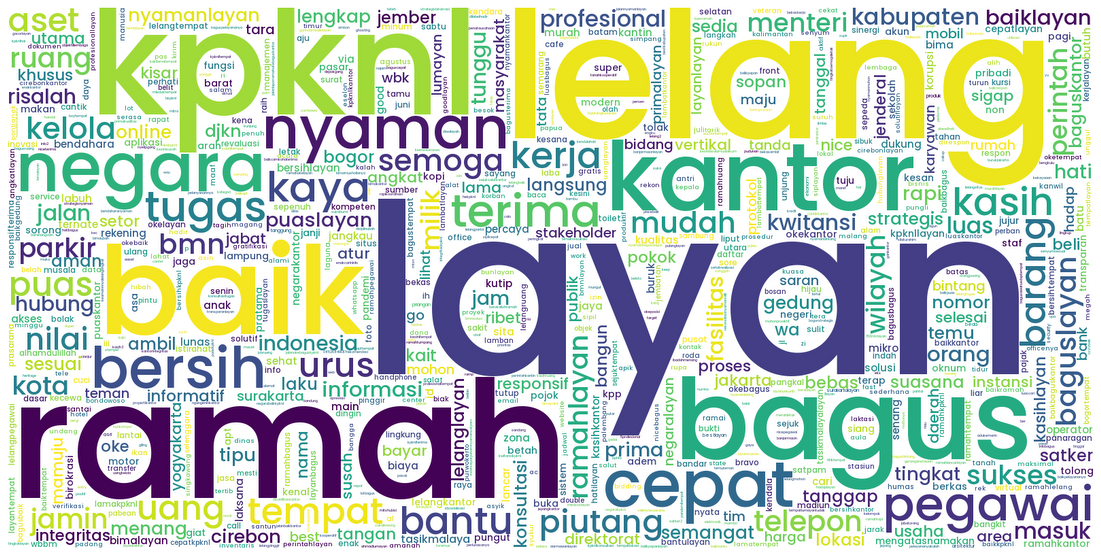

In [88]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud.to_file('all.png')

In [89]:
word_count = df_text.text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count.columns = ['Word', 'Frequency'] 
word_count

Word  Frequency
0         layan        610
1         ramah        266
2         bagus        264
3        lelang        259
4         kpknl        250
...         ...        ...
1385  frontdesk          1
1386      info2          1
1387         5r          1
1388         3s          1
1389     update          1

[1390 rows x 2 columns]

In [90]:
word_count_excel = pd.ExcelWriter('word_count.xlsx')
word_count.to_excel(word_count_excel)
word_count_excel.save()

In [127]:
word_count_2 = df_text[df_text['time']>2021].text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count_2.columns = ['Word', 'Frequency'] 
word_count_2

Word  Frequency
0    layan        396
1    ramah        183
2    kpknl        162
3     baik        135
4    bagus        133
..     ...        ...
886  bosan          1
887  tatap          1
888  sibuk          1
889   muka          1
890   care          1

[891 rows x 2 columns]

In [128]:
word_count_2_excel = pd.ExcelWriter('word_count_2.xlsx')
word_count_2.to_excel(word_count_2_excel)
word_count_2_excel.save()

#### <font color='orange'>Good</font>

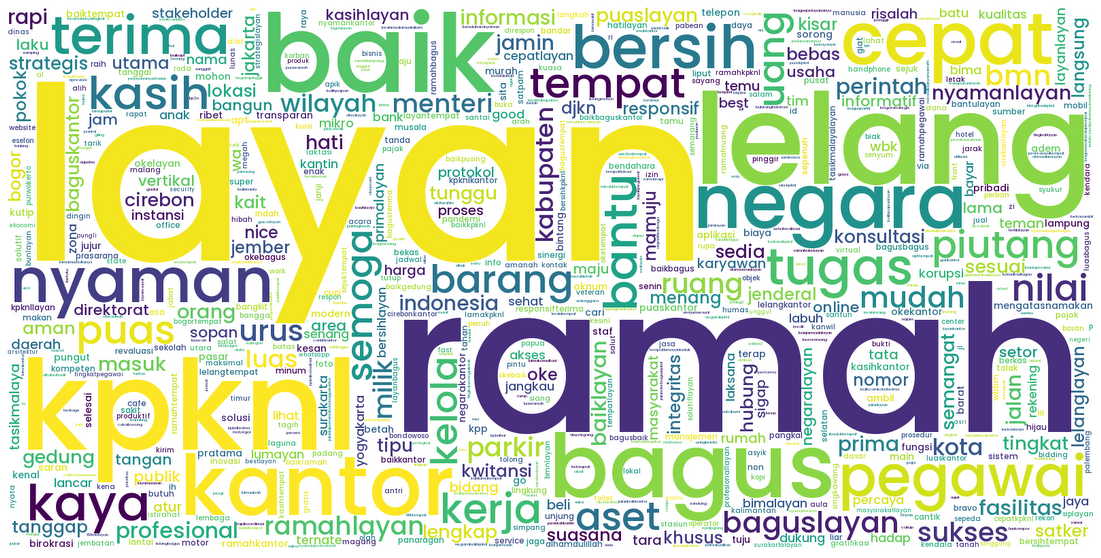

In [91]:
wordcloud_good = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text_good)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_good, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud_good.to_file('good.png')

In [92]:
word_count_good = df_text[df_text['rate']>3].text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count_good.columns = ['Word', 'Frequency'] 
word_count_good

Word  Frequency
0           layan        575
1           ramah        263
2           bagus        258
3           kpknl        227
4          lelang        205
...           ...        ...
1216        silam          1
1217  integritras          1
1218           iv          1
1219        peace          1
1220       kecewa          1

[1221 rows x 2 columns]

In [93]:
word_count_good_excel = pd.ExcelWriter('word_count_good.xlsx')
word_count_good.to_excel(word_count_good_excel)
word_count_good_excel.save()

#### <font color='orange'>Bad</font>

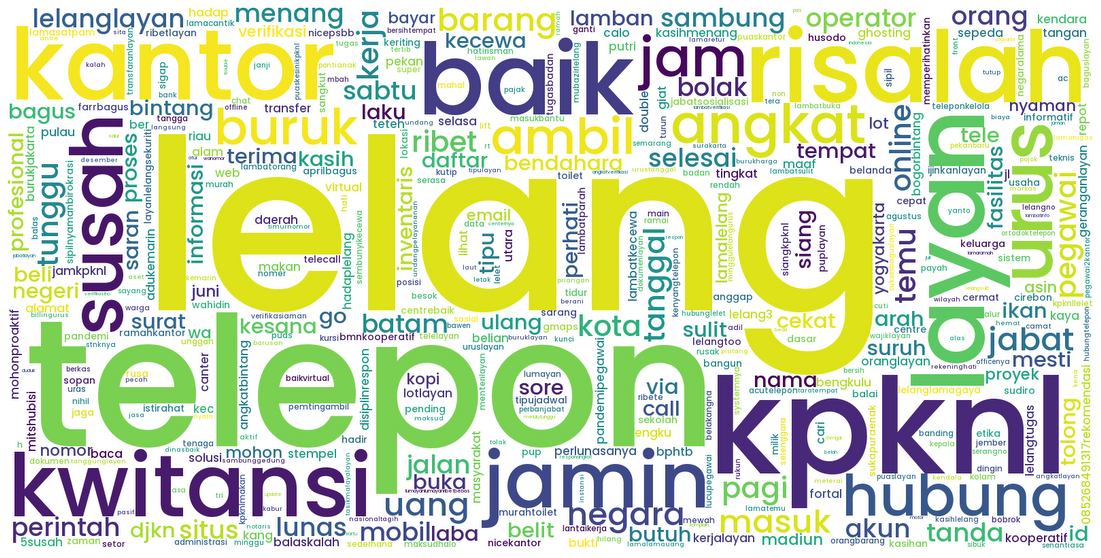

In [94]:
wordcloud_bad = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text_bad)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_bad, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud_bad.to_file('bad.png')

In [95]:
word_count_bad = df_text[df_text['rate']<4].text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count_bad.columns = ['Word', 'Frequency'] 
word_count_bad

Word  Frequency
0     lelang         54
1      layan         35
2    telepon         25
3      kpknl         23
4     kantor         13
..       ...        ...
413    dasar          1
414  sekolah          1
415    etika          1
416     jaga          1
417   update          1

[418 rows x 2 columns]

In [96]:
word_count_bad_excel = pd.ExcelWriter('word_count_bad.xlsx')
word_count_bad.to_excel(word_count_bad_excel)
word_count_bad_excel.save()

In [97]:
word_count_bad_2 = df_text[(df_text['rate']<4)&(df_text['time']>2021)].text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count_bad_2.columns = ['Word', 'Frequency'] 
word_count_bad_2

Word  Frequency
0       lelang         24
1        layan         13
2        kpknl          9
3      telepon          8
4         urus          6
..         ...        ...
226         14          1
227         00          1
228  informasi          1
229      gmaps          1
230         id          1

[231 rows x 2 columns]

In [98]:
df_text[df_text['rate']<4]['time'].value_counts()

2022    46
2021    27
2020    20
2018    18
2019    11
2017     8
Name: time, dtype: int64

### <font color='blue'>Question Data</font>

In [99]:
q_text = q["text_without_stopwords"].to_list()
q_wordcloud_text = ''.join(q_text)

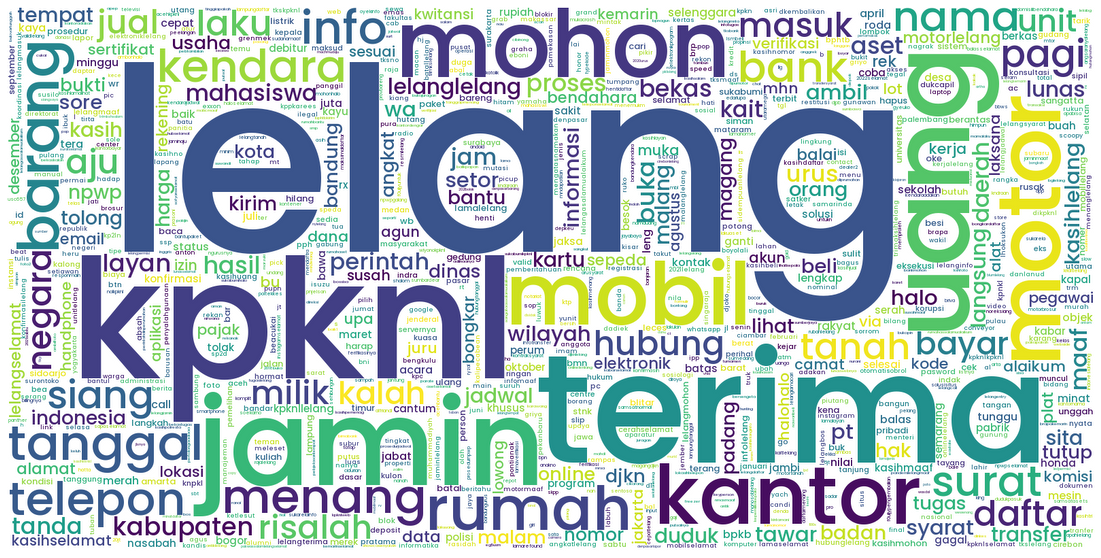

In [126]:
wordcloud_q = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(q_wordcloud_text)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_q, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud_q.to_file('q.png')

In [101]:
q_word_count = q.text_stemmed.str.split(expand=True).stack().value_counts().reset_index()
q_word_count.columns = ['Word', 'Frequency'] 
print(q_word_count.to_markdown())

|      | Word                 |   Frequency |
|-----:|:---------------------|------------:|
|    0 | lelang               |         809 |
|    1 | saya                 |         383 |
|    2 | di                   |         362 |
|    3 | ada                  |         356 |
|    4 | yang                 |         276 |
|    5 | apakah               |         239 |
|    6 | apa                  |         207 |
|    7 | mau                  |         198 |
|    8 | kpknl                |         196 |
|    9 | bisa                 |         185 |
|   10 | tanya                |         172 |
|   11 | untuk                |         165 |
|   12 | tidak                |         161 |
|   13 | pak                  |         150 |
|   14 | bagaimana            |         150 |
|   15 | terima               |         136 |
|   16 | dan                  |         134 |
|   17 | ya                   |         133 |
|   18 | ikut                 |         130 |
|   19 | cara                 |   

In [102]:
q_word_count_2 = q.text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
q_word_count_2.columns = ['Word', 'Frequency'] 
print(q_word_count_2.to_markdown())

|      | Word                 |   Frequency |
|-----:|:---------------------|------------:|
|    0 | lelang               |         809 |
|    1 | kpknl                |         196 |
|    2 | terima               |         136 |
|    3 | mohon                |         118 |
|    4 | jamin                |         115 |
|    5 | kasih                |         114 |
|    6 | motor                |         108 |
|    7 | uang                 |         106 |
|    8 | mobil                |          88 |
|    9 | kantor               |          77 |
|   10 | selamat              |          76 |
|   11 | info                 |          73 |
|   12 | menang               |          66 |
|   13 | rumah                |          65 |
|   14 | tanggal              |          57 |
|   15 | telepon              |          57 |
|   16 | barang               |          56 |
|   17 | maaf                 |          54 |
|   18 | kendara              |          51 |
|   19 | daftar               |   

In [124]:
q_word_count_2_excel = pd.ExcelWriter('q_word_count_2.xlsx')
q_word_count_2.to_excel(q_word_count_2_excel)
q_word_count_2_excel.save()

In [125]:
q_word_count_3 = q[q['time']>2021].text_without_stopwords.str.split(expand=True).stack().value_counts().reset_index()
q_word_count_3.columns = ['Word', 'Frequency'] 
print(q_word_count_3.to_markdown())

|     | Word             |   Frequency |
|----:|:-----------------|------------:|
|   0 | lelang           |         256 |
|   1 | kpknl            |          55 |
|   2 | terima           |          50 |
|   3 | motor            |          42 |
|   4 | mohon            |          41 |
|   5 | kasih            |          39 |
|   6 | selamat          |          33 |
|   7 | uang             |          32 |
|   8 | jamin            |          30 |
|   9 | barang           |          28 |
|  10 | menang           |          28 |
|  11 | mobil            |          26 |
|  12 | info             |          21 |
|  13 | lama             |          21 |
|  14 | surat            |          20 |
|  15 | risalah          |          20 |
|  16 | daftar           |          20 |
|  17 | kantor           |          19 |
|  18 | telepon          |          18 |
|  19 | halo             |          18 |
|  20 | aju              |          17 |
|  21 | kendara          |          16 |
|  22 | tanggal 

In [104]:
q_word_count_3_excel = pd.ExcelWriter('q_word_count_3.xlsx')
q_word_count_3.to_excel(q_word_count_3_excel)
q_word_count_3_excel.save()

# Sentiment Analysis

In [105]:
sentiment_classifier = pipeline('text-classification', model="sahri/indonesiasentiment")

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /sahri/indonesiasentiment/resolve/main/config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000016111D18910>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/sahri/indonesiasentiment/resolve/main/config.json
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at sahri/indonesiasentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [106]:
df_clean_text = df_text[["id", "text_clean"]]
df_clean_text

id                                         text_clean
0        rvw1  pelayanan sangat baik sekali orang orangnya sa...
1        rvw2  pelayanan sangat baik semoga kedepannya semaki...
2        rvw3                  apt nya ramah dan sangat membantu
3        rvw4                          pelayanan ramah dan cepat
4        rvw5                        kpknl ambon yang lebih baik
...       ...                                                ...
1268  rvw2687                                 kantor yang bagus.
1269  rvw2688                            balai lelang yogyakarta
1270  rvw2689                                              bagus
1271  rvw2690             penampilan yang bagus good performance
1272  rvw2691                                         bagus nice

[1273 rows x 2 columns]

In [107]:
sentiment_list = []

text_list = df_clean_text['text_clean'].tolist()

for i in tqdm(range(len(df_clean_text))): 
  
  if(text_list[i] == ''):
    result = sentiment_classifier('neutral')[0]
    sentiment_list.append(result["label"])
  else:
    result = sentiment_classifier(text_list[i])[0]
    sentiment_list.append(result["label"])

print(sentiment_list[:5])

100%|██████████| 1273/1273 [03:17<00:00,  6.44it/s]

['positive', 'positive', 'positive', 'positive', 'positive']


In [108]:
df_clean_text['sentiment'] = sentiment_list
df_clean_text['sentiment'].value_counts()

<ipython-input-108-d8a059da3a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_text['sentiment'] = sentiment_list


positive    887
neutral     255
negative    131
Name: sentiment, dtype: int64

In [109]:
df_text['sentiment'] = df_clean_text['sentiment']
df_text

<ipython-input-109-453b0e404006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['sentiment'] = df_clean_text['sentiment']


id                name  \
0        rvw1       thaty laipeny   
1        rvw2           Simak BMN   
2        rvw3      Tajus Syarifin   
3        rvw4       Jhon Sahureka   
4        rvw5             anton w   
...       ...                 ...   
1268  rvw2687     A Lingga Arrauf   
1269  rvw2688            M FARHAN   
1270  rvw2689  1623_Arnetta Yiska   
1271  rvw2690           LBH EIGHT   
1272  rvw2691       novi ramdhani   

                                                   text  \
0     Pelayanannya sangat baik sekali, orang2nya san...   
1     Pelayanan sangat baik, semoga kedepannya semak...   
2                     APT nya ramah dan sangat membantu   
3                          Pelayanannya ramah dan cepat   
4                             kpknl ambon yg lebih baik   
...                                                 ...   
1268                                 Kantor yang bagus.   
1269                            Balai lelang yogyakarta   
1270                                              Siiip   
1271  (Diterjemahkan oleh Google) Penampilan yang ba...   
1272      (Diterjemahkan oleh Google) Bagus (Asli) Nice   

                                             text_clean  \
0     pelayanan sangat baik sekali orang orangnya sa...   
1     pelayanan sangat baik semoga kedepannya semaki...   
2                     apt nya ramah dan sangat membantu   
3                             pelayanan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                 kantor yang bagus.   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271             penampilan yang bagus good performance   
1272                                         bagus nice   

                                           text_stemmed  \
0     layan sangat baik sekali orang orang sangat ramah   
1     layan sangat baik semoga depan makin makin bai...   
2                        apt nya ramah dan sangat bantu   
3                                 layan ramah dan cepat   
4                           kpknl ambon yang lebih baik   
...                                                 ...   
1268                                  kantor yang bagus   
1269                            balai lelang yogyakarta   
1270                                              bagus   
1271                 tampil yang bagus good performance   
1272                                         bagus nice   

             text_without_stopwords  rate  time         loc sentiment  
0      layan baik orang orang ramah     5  2022       Ambon  positive  
1            layan baik semoga baik     5  2022       Ambon  positive  
2                   apt ramah bantu     5  2022       Ambon  positive  
3                 layan ramah cepat     5  2022       Ambon  positive  
4                  kpknl ambon baik     5  2022       Ambon  positive  
...                             ...   ...   ...         ...       ...  
1268                   kantor bagus     5  2018  Yogyakarta  positive  
1269        balai lelang yogyakarta     5  2019  Yogyakarta   neutral  
1270                          bagus     5  2022  Yogyakarta  positive  
1271  tampil bagus good performance     5  2022  Yogyakarta  positive  
1272                     bagus nice     5  2020  Yogyakarta  positive  

[1273 rows x 10 columns]

In [110]:
df_text_excel = pd.ExcelWriter('df_text.xlsx')
df_text.to_excel(df_text_excel)
df_text_excel.save()

In [111]:
label = 'positive', 'neutral', 'negative'
df_sentiment = df_clean_text['sentiment'].value_counts().to_list()
df_sentiment

[887, 255, 131]

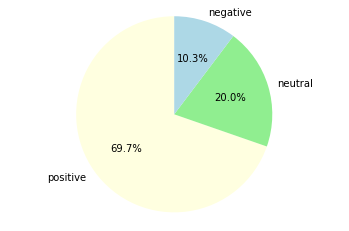

In [112]:
fig1, ax1 = plt.subplots()
ax1.pie(df_sentiment, labels=label, autopct='%1.1f%%', startangle=90, colors=['lightyellow', 'lightgreen', 'lightblue'])
ax1.axis('equal') 
plt.show()

In [113]:
df_text[df_text['sentiment']=='negative']['text']

8       Hati-hati terhadap penipuan yang mengatasnamak...
25      pelayanannya Buruk Banget ya ! saya telphone S...
27      Bintang 1 dulu Maaf kang teteh Operator telepo...
38      (Diterjemahkan oleh Google) Kantor pertama say...
44      Kenapa setiap pemenang lelang harus datang ke ...
                              ...                        
1253    nunggu verifikasi KTP di lelang.go.id nunggu K...
1255    Apa sangat ramah apanya? Di telpon aja gak per...
1258    Verifikasi lelang lambat, pengembalian jaminan...
1261    Veryfikasi lemot..lelang udah selesai baru ver...
1262        No tlp tdk update... Di tlp salah sambung....
Name: text, Length: 131, dtype: object

In [114]:
df_text[df_text['sentiment']=='negative']['rate'].mean()

2.6564885496183206

In [115]:
df_text[df_text['sentiment']=='neutral']['rate'].mean()

4.5019607843137255

In [116]:
df_text[df_text['sentiment']=='positive']['rate'].mean()

4.846674182638106

In [117]:
df_text[df_text['sentiment']=='negative']['time'].mean()

2020.4045801526718

In [118]:
df_text[df_text['sentiment']=='neutral']['time'].mean()

2019.9450980392157

In [119]:
df_text[df_text['sentiment']=='positive']['time'].mean()

2020.8117249154452

In [120]:
df_text['time'].mean()

2020.5962293794187

In [121]:
df_text[(df_text['sentiment']=='negative')&(df_text['time']==2022)]

id                       name  \
25      rvw74               Narda Dinata   
27      rvw76               Chicken Bite   
44     rvw108                 Oby Kiswan   
80     rvw194               Febrian doni   
86     rvw200             sayidi setiaji   
137    rvw292               sagita arman   
144    rvw299             mustaqim doank   
146    rvw301                  Djeladjah   
161    rvw316           AJI SURA SAPUTRA   
164    rvw319      Oki Rosmansyah (Okky)   
225    rvw380                Fadil Akbar   
342    rvw813                   bojim mr   
409    rvw976            Ichwatun Naimah   
410    rvw977                 Vavin Gede   
430   rvw1016              remi nicoline   
433   rvw1019            Josua Crystovel   
454   rvw1098              allan cahyadi   
458   rvw1102                 Aki Kering   
461   rvw1105             Agus Kurniawan   
468   rvw1112          Ahmad Yudhisthira   
474   rvw1118           Dewi Sri Lestari   
501   rvw1145                      Dimaz   
514   rvw1220                  alif syah   
519   rvw1225            Josua Crystovel   
563   rvw1314             grace sitinjak   
608   rvw1398             didik yuniarto   
652   rvw1476              agung purwoko   
682   rvw1573               Achmad Fauzi   
778   rvw1791     Maduratna Persadaindah   
848   rvw1912             dedy kurniawan   
880   rvw1974                  Nur Hakim   
892   rvw1986                  Tatak Wan   
916   rvw2073  Diponegoro Smart Solution   
918   rvw2075         Pramudya Kurniawan   
919   rvw2076             Anky Setyadewa   
930   rvw2087               Candra Adi P   
941   rvw2114                Mahpudin Rm   
996   rvw2227       Kristina Sri Redjeki   
998   rvw2229                RIDHAF CORP   
999   rvw2230              raditya danar   
1000  rvw2231             Adimas Prabowo   
1005  rvw2236            Bambang Stankov   
1229  rvw2648                very Gunner   
1236  rvw2655             rajagy zg babo   
1247  rvw2666              windhy irawan   
1252  rvw2671               wahhab anang   
1253  rvw2672                AR Official   
1258  rvw2677              Sony Nursepta   

                                                   text  \
25    pelayanannya Buruk Banget ya ! saya telphone S...   
27    Bintang 1 dulu Maaf kang teteh Operator telepo...   
44    Kenapa setiap pemenang lelang harus datang ke ...   
80    Gk rekomen beli kendaraan lelang di Bengkulu k...   
86                                              Camkoha   
137   Sangat mengecewakan masa kita mau pelunasan le...   
144   Kalah lelang, sdh satu pekan uang blm d kembal...   
146   Sudah lama lihat gedungnya. Dulu saya suka ban...   
161                              Pelayanan sangat buruk   
164   gedung lama,jadul, tp nyaman dan sejuk.. pegaw...   
225                                               Sedap   
342                       Pelayanan yang berintegritas.   
409   Pelayanan lambat orang di suruh bolak balik un...   
410   Parah, bolak balik minta uang jaminan di kemba...   
430   Pelayanan sangat buruk. Tidak dapat menyelesai...   
433         PERBAIKI SISTEM LELANG DJKN, banyak tipuan.   
454   KPKNL 3, ibu2 agak keriting kurang Sopan membe...   
458   BUMN begini nih. Pegawainya pelayanannya waktu...   
461   Keadaan toilet sangat tidak diperhatikan, dan ...   
468          Kerja begitu lelet dan banyak bertele-tele   
474   Sangat sulit untuk menemui para kurator & aset...   
501   (Diterjemahkan oleh Google) Mengelola sesuatu ...   
514   Bpk Risman, betul" payah. Harus diganti tu ora...   
519   Barang yg di upload disitus barang yang kemaha...   
563   Kantornya bersih, pelayanannya cepatt jugaa, b...   
608   telp berkali Kali mulai Pagi tidak ada yg angk...   
652   (Diterjemahkan oleh Google) adeeeem kntr yaaa....   
682   Min. Saya hubungi di layanan WA sesuai jam ker...   
778   Sy ingin bertanya.apakah ada kontak seluler dr...   
848                                Pelayanan agak lama.   
880   Kenapa pak, kok sul

In [122]:
word_count_negative = df_text[(df_text['sentiment']=='negative')&(df_text['time']==2022)].text_clean.str.split(expand=True).stack().value_counts().reset_index()
word_count_negative.columns = ['Word', 'Frequency'] 
word_count_negative

Word  Frequency
0                 di         23
1              tidak         19
2             lelang         18
3               yang         15
4          pelayanan         14
..               ...        ...
404           sarang          1
405  memperihatinkan          1
406     diperhatikan          1
407          keadaan          1
408           lambat          1

[409 rows x 2 columns]

In [123]:
print(q['text'].to_markdown())

|     | text                                                                                     |
|----:|:-----------------------------------------------------------------------------------------|
|   0 | Selamat sore pak,saya dari kasi barang bukti kejari seram                                |
|     |                     bagian timur (sbt) untuk contact person yg bisa hub utk              |
|     |                     lelang barang bukti sapa yah pak?🙏🙏🙏                              |
|   1 | Selamat siang... mau nanya pemenang lelang 1 unit mobil                                  |
|     |                     isuzu panther di kantor wilayah DJPB Ambon itu siapa ya???           |
|   2 | (Diterjemahkan oleh Google) halo halo halo halo halo halo                                |
|     |                     halo halo halo halo halo halo halo halo(Asli)halo                    |
|     |                     halohalo halohalo halohalo halohalo halohalo halohalo                |
|     |      

# End